<a href="https://colab.research.google.com/github/Ben-069/GIS-Public-Sector/blob/main/PS05_Benito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AGRICULTURAL LAND, SOCIAL, ECONOMIC, AND DEMOGRAPHIC OVERVIEW OF PARAGUAY**

Introduction

Paraguay is located in the heart of South America between the coordinates: 23.4425° South, 58.4438° West. It is also bordered by countries like Brazil and Bolivia on its northern side, Argentina and Brazil on the east side, and Brazil and Bolivia on the west. Paraguay has a total area of 406,752 square meters. According to the National Institute of Statistics (INE, 2022), Paraguay has a population of 6.109.644 after the last national census in 2022.

Paraguay is divided into two main regions, The "Region Oriental" in the north and the "Region Oriental" in the south and administrative divided into 17 departments (equivalent to provinces or states). Every departament are also divided into municipalities called "Distritos".

Agriculture, Cattle Raising, forestry and fishing, contributes the 30 percent to the Gross Domestic Product.From Which 40% are from exports of products like soybean, corn, etc.

Objective:

The main objective of this project is to make a contrast between the Productive Areas in Paraguay and its principal socio, economic and demographical facts such as poverty, education level, population density.

Methodology:

This project has a descriptive approach. And collect and compare data from official government sources like the National Institute of Statistics (INE), The last 2022 National Census, The Las Agronomic Census, the Paraguayan Ministry of Agriculture (MAG), the National Meteorologic and Hydrologic Department (DMH) and other external sources such as the World Bank, The Food And Agriculture Organization etc.

Geopandas and Python were used to generate the maps and graphics.

Limitations:

The lack of actual accessible data on those topics mentioned above
The extreme bureaucracy and inefficiency of the Paraguayan government to provide data

### sec`

In [64]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [65]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [66]:
#!python --version
gpd.__version__

'1.0.1'

In [67]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O agripy.zip https://docs.google.com/uc?id=1VD1HfR2OAl2HcYY3PPVzShk1HfkZzEMc&export=download
zip_ref = zipfile.ZipFile('agripy.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
agripyC0=gpd.read_file('/content/AgroMaps/LatinAmericaCaribbean/shapefiles/PRY/admin1/pry.shp') #load the shapefile with gpd as njC

<Axes: >

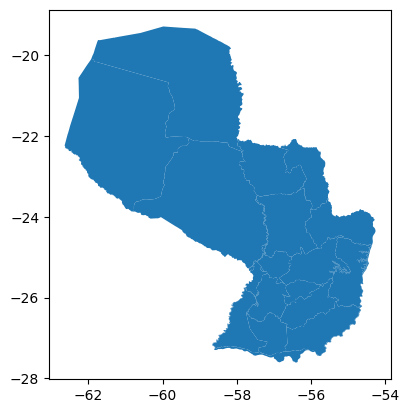

In [68]:
agripyC0.plot()

In [69]:
agripyC0.columns

Index(['UNCODEOR', 'CNTNAME3', 'COUNTRY_NA', 'CNTCODE_', 'NAME1_', 'PCODE',
       'COMMENTS_', 'geometry'],
      dtype='object')

In [70]:
agripyC0 = agripyC0.rename(columns={"NAME1_": "Departamentos"})

In [71]:
agripyC0['Departamentos']

0          Alto Paraguay
1            Alto Parana
2                Amambay
3               Asuncion
4               Boqueron
5               Caaguazu
6                Caazapa
7              Canindeyu
8                Central
9             Concepcion
10            Cordillera
11                Guaira
12                Itapua
13    Lagos, Islas, Rios
14              Misiones
15              Neembucu
16             Paraguari
17      Presidente Hayes
18             San Pedro
Name: Departamentos, dtype: object

## ANNUAL TEMPERATURE RATE
During 2022, Paraguayan territory experienced heat waves in January, March, and December, **with the highest maximum temperature of** **44.2°C** **(111.56 F)** recorded in Mariscal Estigarribia, Boquerón, on December 9. July was notably warm across the country, with average maximum temperatures ranging from 4°C to 6°C above the monthly average. The highest temperatures were concentrated in the extreme north of the Western Region, setting new historical records for maximum temperature during this month. New daily records for maximum temperatures were recorded throughout the year, including six new historical highs.

During winter, **minimum temperatures dropped below 0.0°C**, **(32F) **with the lowest value of the year at -2.4°C **(28 F Aprox)** recorded in General Bruguéz, Presidente Hayes, on August 19. Notably, in August and December, cold air masses moved over the country, breaking daily minimum temperature records in most towns. Frost and freezing events were observed in several areas in May, June, and August.



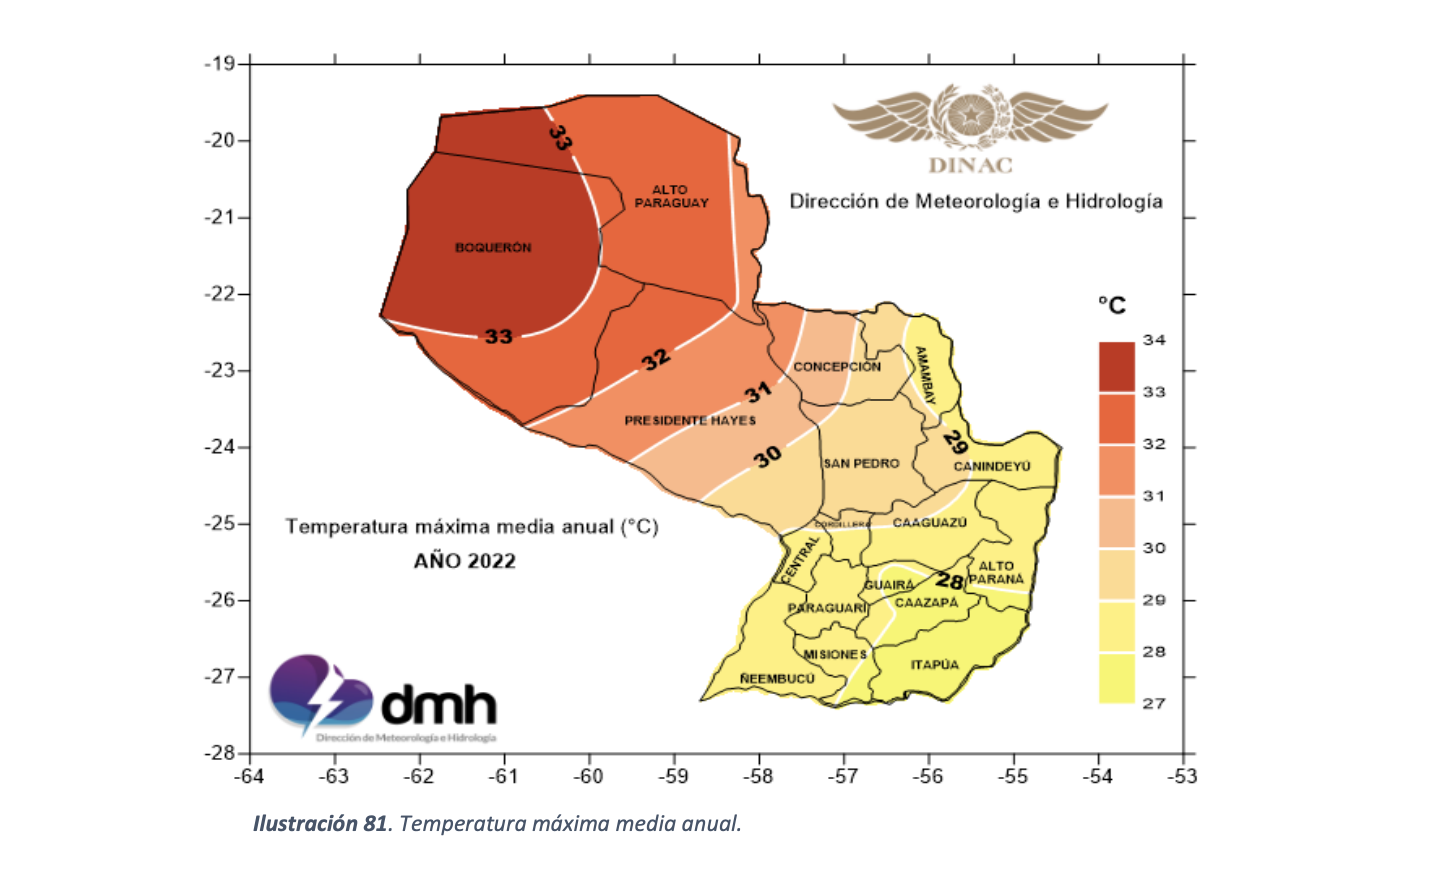


https://www.meteorologia.gov.py/wp-content/uploads/2023/05/Anuario_climatologico_2022.pdf

Screenshot 2024-11-07 at 2.47.15 PM.png

https://www.meteorologia.gov.py/wp-content/uploads/2023/05/Anuario_climatologico_2022.pdf

## ANNUAL PRECIPITATION RATE
**The highest monthly accumulated precipitation was 425.2 mm, while the maximum 24-hour precipitation rate was 155.4 mm, recorded on March 23 in the town of Capitán Meza, department of Itapúa.** Accumulated precipitation throughout the year was generally deficient across most of the national territory, except for some areas in the center, southeast, east, and northeast of the Eastern Region. Moderate to strong winds were observed, particularly in March and October, with maximum speeds exceeding **100 km/h**, mainly during rain events with thunderstorms in various localities. The highest wind speed recorded by the automatic station network was 119 km/h on March 30 in Encarnación, department of Itapúa. (DMH, 2022)

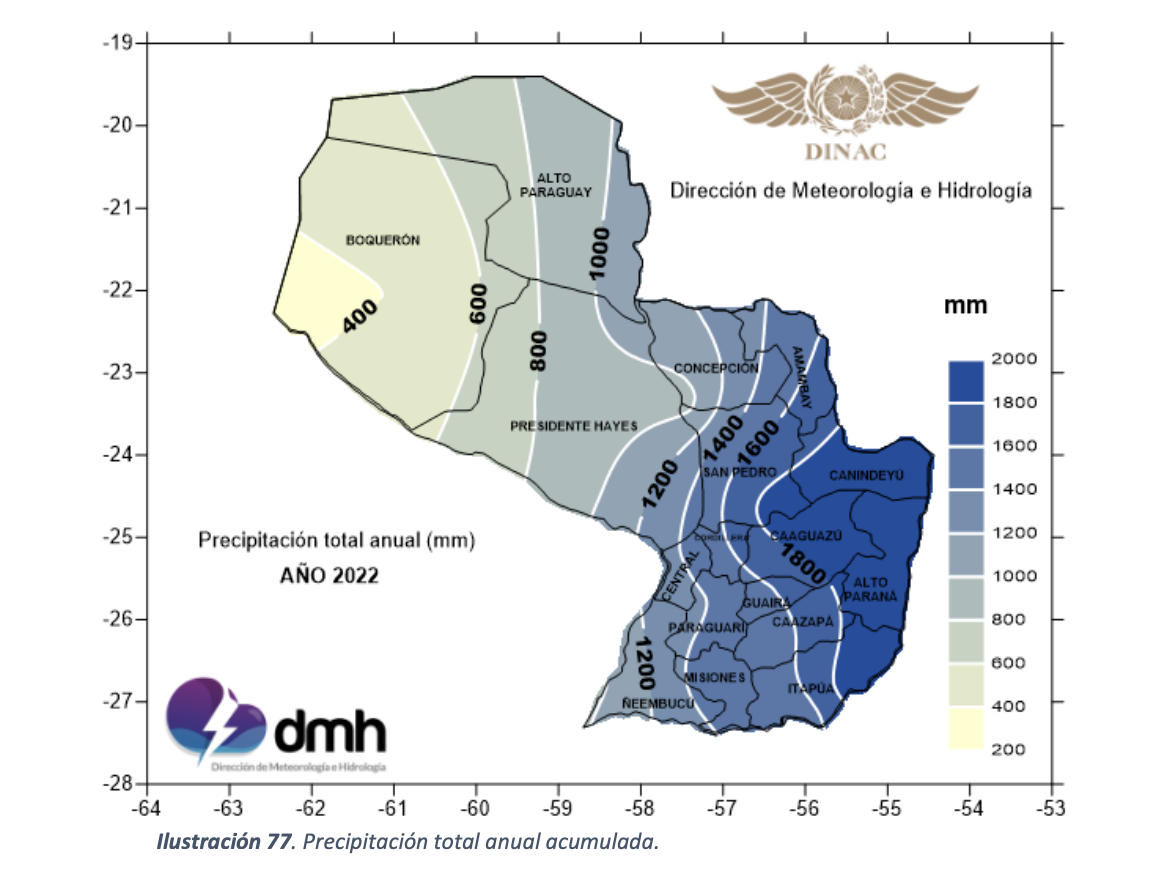

https://www.meteorologia.gov.py/wp-content/uploads/2023/05/Anuario_climatologico_2022.pdf

## **PARAGUAY POPULATION DENSITY**

According to data from the 2022 National Census, Paraguay has a population of 6,109,644, comprising 3,078,000 men and 3,030,650 women, distributed across 2,109,864 households. The majority of the population, 4,215,101 people (69.0%), reside in urban areas, while 1,894,802 people (31.0%) live in rural areas. The final census results also reveal that Central is the most populated department in the country, with 1,883,927 inhabitants.

https://www.ine.gov.py/Publicaciones/Biblioteca/documento/233/censo2022.pdf

In [55]:
pop2022=pd.read_excel('https://docs.google.com/uc?id=1IG11BS_p2ON6v8oHKe_YiIuKeBGvYsQk&export=download')

In [56]:
pop2022.head(25)

Departamentos  Total de Viviendas  Poblacion
0           Asuncion              153029     477346
1         Concepcion               65920     204536
2          San Pedro              134826     341895
3         Cordillera              106425     271475
4             Guaira               69629     180121
5           Caaguazu              153305     430142
6            Caazapa               54326     140060
7            Itapua               176247     436966
8           Misiones               44437     114542
9          Paraguari               79083     199430
10       Alto Parana              251277     784839
11           Central              587194    1866562
12          Neembucu               33763      85749
13           Amambay               58805     173770
14         Canindeyu               71763     189128
15  Presidente Hayes               40618     126880
16         Boqueron                23202      68595
17     Alto Paraguay                6155      17608

In [57]:
pop2022.dtypes

Departamentos         object
Total de Viviendas     int64
Poblacion              int64
dtype: object

In [58]:
pop1 = pd.merge(agripyC0, pop2022, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
pop1[['Departamentos','Poblacion','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos  Poblacion      _merge
0        Alto Paraguay    17608.0        both
1          Alto Parana   784839.0        both
2              Amambay   173770.0        both
3             Asuncion   477346.0        both
4             Boqueron        NaN   left_only
5            Boqueron     68595.0  right_only
6             Caaguazu   430142.0        both
7              Caazapa   140060.0        both
8            Canindeyu   189128.0        both
9              Central  1866562.0        both
10          Concepcion   204536.0        both
11          Cordillera   271475.0        both
12              Guaira   180121.0        both
13              Itapua        NaN   left_only
14             Itapua    436966.0  right_only
15  Lagos, Islas, Rios        NaN   left_only
16            Misiones   114542.0        both
17            Neembucu    85749.0        both
18           Paraguari   199430.0        both
19    Presidente Hayes   126880.0        both
20           San Pedro   341895.0        both

In [59]:
agripyC0['Departamentos'] = agripyC0['Departamentos'].str.strip()
pop2022['Departamentos'] = pop2022['Departamentos'].str.strip()

In [60]:
agripyC0 = agripyC0.dropna(subset=['Departamentos'])
pop2022 = pop2022.dropna(subset=['Departamentos'])

In [61]:
pop2 = pd.merge(agripyC0, pop2022, on='Departamentos',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [62]:
type(pop2)

geopandas.geodataframe.GeoDataFrame

In [63]:
#do think how distribution translate into colors!!
pop2.Poblacion.hist() #super skewed!

<Axes: >

In [64]:
fig, ax = plt.subplots(1, figsize=(6,10))
pop2.plot(ax=ax, column='Poblacion', legend=True, cmap='Oranges',
              scheme='user_defined', classification_kwds= {'bins':[250000, 750000, 1200000]},k=4, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title('''Legend''')  # Cambié el texto a "Legend"
ax.set_title("Paraguay's 2022 Population")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

<Axes: >

Text(0.5, 1.0, "Paraguay's 2022 Population")

[]

[]

Text(0.5, 219.56354829913386, 'INE, 2022')

## POPULATION PER KM2

In [41]:
podenpy=pd.read_excel('https://docs.google.com/uc?id=1mbYdwMkJY_W-5ITbIr4uyUa2i_-GmgrS&export=download')

In [42]:
podenpy.head(20)

Departamento  Población total  Superficie Km2  Densidad Hab/km2
0               Total        6109903.0        406752.0         15.021200
1            Asunción         462241.0           117.0       3950.777778
2          Concepción         206181.0         18051.0         11.422137
3           San Pedro         355175.0         20002.0         17.756974
4          Cordillera         268037.0          4948.0         54.170776
5              Guairá         179555.0          3846.0         46.686167
6            Caaguazú         431519.0         11474.0         37.608419
7             Caazapá         139479.0          9496.0         14.688184
8              Itapúa         449642.0         16525.0         27.209803
9            Misiones         111142.0          9556.0         11.630599
10          Paraguarí         200472.0          8705.0         23.029523
11        Alto Paraná         763702.0         14895.0         51.272373
12            Central        1883927.0          2465.0        764.270588
13           Ñeembucú          76719.0         12147.0          6.315880
14            Amambay         179412.0         12933.0         13.872419
15          Canindeyú         191114.0         14667.0         13.030204
16  Presidente  Hayes         123313.0         72907.0          1.691374
17           Boquerón          71078.0         91669.0          0.775377
18      Alto Paraguay          17195.0         82349.0          0.208806
19                NaN              NaN             NaN               NaN

In [43]:
pip install unidecode

In [44]:
from unidecode import unidecode

In [45]:
# Supongamos que la columna que quieres normalizar se llama 'nombre'
podenpy['Departamentos'] = podenpy['Departamento'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Guardar el dataset con la columna normalizada en un nuevo archivo Excel
#yucapy.to_excel("tu_archivo_normalizado.xlsx", index=False)

#I got this code from AI

In [46]:
podenpy['Departamentos'] = podenpy['Departamentos'].str.strip()  # Eliminar espacios al inicio y final
podenpy['Departamentos'] = podenpy['Departamentos'].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno solo

In [47]:
popdenpy2022=podenpy[['Departamentos', 'Densidad Hab/km2']]

In [48]:
popdenpy2022.dtypes

Departamentos        object
Densidad Hab/km2    float64
dtype: object

In [49]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
popdenpy1= pd.merge(popdenpy2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
popdenpy1[['Departamentos','Densidad Hab/km2','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos  Densidad Hab/km2  \
0                                       Alto Paraguay          0.208806   
1                                         Alto Parana         51.272373   
2                                             Amambay         13.872419   
3                                            Asuncion       3950.777778   
4                                            Boqueron          0.775377   
5                                            Caaguazu         37.608419   
6                                             Caazapa         14.688184   
7                                           Canindeyu         13.030204   
8                                             Central        764.270588   
9                                          Concepcion         11.422137   
10                                         Cordillera         54.170776   
11  Direccion del Servicio Geografico Militar (DIS...               NaN   
12  Fuente: INE. Censo Nacional de Poblacion y Viv...               NaN   
13                                             Guaira         46.686167   
14                                             Itapua         27.209803   
15                                 Lagos, Islas, Rios               NaN   
16                                           Misiones         11.630599   
17                                           Neembucu          6.315880   
18                                          Paraguari         23.029523   
19                                   Presidente Hayes          1.691374   
20                                          San Pedro         17.756974   
21                                              Total         15.021200   
22                                                NaN               NaN   

        _merge  
0         both  
1         both  
2         both  
3         both  
4         both  
5         both  
6         both  
7         both  
8         both  
9         both  
10        both  
11   left_only  
12   left_only  
13        both  
14        both  
15  right_only  
16        both  
17        both  
18        both  
19        both  
20        both  
21   left_only  
22   left_only

In [50]:
#merge part 2
popdenpy_final = pd.merge(popdenpy1, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [51]:
popdenpy_final['Densidad Hab/km2'].hist()

<Axes: >

In [52]:
type(popdenpy_final)

pandas.core.frame.DataFrame

In [53]:
popdenpy_final=gpd.GeoDataFrame(popdenpy_final, geometry='geometry_x')

In [54]:
fig, ax = plt.subplots(1, figsize=(6,10))
popdenpy_final.plot(ax=ax, column='Densidad Hab/km2', legend=True, cmap='PuRd',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title(''' People per/km2''')  # Cambié el texto a "Legend"
ax.set_title("POPULATION DENSITY")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CENSUS BUREAU - INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

<Axes: >

Text(0.5, 1.0, 'POPULATION DENSITY')

[]

[]

Text(0.5, 210.29872565733612, 'CENSUS BUREAU - INE, 2022')

## **POVERTY RATE**

The monthly cost per person of a food basket or extreme poverty line in urban areas is 312,187 guaraníes and for total poverty it is 771,558 guaraníes (USD100) . On the other hand, in rural areas for the year 2021 the extreme poverty line has a value of 285,099 guaraníes (USD 37.14) and the total poverty line of 554,377 guaraníes (USD 72.21) per month per person (Table No. 1). The extreme poverty line in urban areas is higher than in rural areas by approximately 9%, as well as the total poverty line is higher in favor of urban areas by 28%. The value of the basic food basket (extreme poverty line) for the year 2021 increased by 14.7% compared to 2020, while the basic consumption basket (total poverty line) increased by 8.3% in urban areas and by 9.5% in rural areas. (NATIONAL INSTITUTE OF STATISTICS, 2021
https://www.ine.gov.py/Publicaciones/Biblioteca/documento/5626_Boletin_Pobreza%20Monetaria_%20EPHC%202021_INE.pdf

In [72]:
poverty=pd.read_excel('https://docs.google.com/uc?id=14xsDVN-olMnxH1VXDSO920o9aif54Y6K&export=download')

In [73]:
poverty.head(20)

Departamentos  Pobreza Extrema  Pobreza no Extrema     Pobre   \
0           Asuncion           2001.0              44667.0   46667.0   
1         Concepcion          26170.0              63487.0   89657.0   
2          San Pedro          43730.0              87271.0  131001.0   
3         Cordillera          14871.0              42294.0   57165.0   
4             Guaira          19842.0              50196.0   70038.0   
5           Caaguazu          48200.0             132519.0  180720.0   
6            Caazapa          23138.0              41323.0   64461.0   
7             Itapua          36619.0             110512.0  147131.0   
8           Misiones           6402.0              27280.0   33683.0   
9          Paraguari          22130.0              41455.0   63585.0   
10       Alto Parana          48519.0             143499.0  192019.0   
11           Central          29976.0             252462.0  282439.0   
12          Neembucu           3040.0              14937.0   17978.0   
13           Amambay           6437.0              30809.0   37246.0   
14         Canindeyu          21381.0              38641.0   60021.0   
15  Presidente Hayes           2846.0              11573.0   14419.0   
16          Boqueron              NaN                  NaN       NaN   
17     Alto Paraguay              NaN                  NaN       NaN   

     No Pobre  
0    383790.0  
1    119493.0  
2    225273.0  
3    203831.0  
4    127850.0  
5    261619.0  
6     90828.0  
7    288622.0  
8     73722.0  
9    131976.0  
10   525459.0  
11  1561374.0  
12    52335.0  
13   109808.0  
14   109059.0  
15    72262.0  
16        NaN  
17        NaN

In [74]:
poverty.dtypes

Departamentos           object
Pobreza Extrema        float64
Pobreza no Extrema     float64
Pobre                  float64
No Pobre               float64
dtype: object

In [75]:
agripyC0['Departamentos']=agripyC0['Departamentos'].str.strip()

In [76]:
agripyC0['Departamentos']

0          Alto Paraguay
1            Alto Parana
2                Amambay
3               Asuncion
4               Boqueron
5               Caaguazu
6                Caazapa
7              Canindeyu
8                Central
9             Concepcion
10            Cordillera
11                Guaira
12                Itapua
13    Lagos, Islas, Rios
14              Misiones
15              Neembucu
16             Paraguari
17      Presidente Hayes
18             San Pedro
Name: Departamentos, dtype: object

In [77]:
agripyC0['Departamentos']=agripyC0['Departamentos'].str.strip()
poverty['Departamentos']=poverty['Departamentos'].str.strip()

In [78]:
poordta = pd.merge(agripyC0, poverty, on='Departamentos',how='outer',indicator=True) #(make sure to have agripyCO shapefile from previous sec)
poordta[['Departamentos','Pobre ','_merge']]
poordta_final = pd.merge(agripyC0, poverty, on='Departamentos',how='inner',indicator=False)

Departamentos    Pobre      _merge
0        Alto Paraguay       NaN       both
1          Alto Parana  192019.0       both
2              Amambay   37246.0       both
3             Asuncion   46667.0       both
4             Boqueron       NaN       both
5             Caaguazu  180720.0       both
6              Caazapa   64461.0       both
7            Canindeyu   60021.0       both
8              Central  282439.0       both
9           Concepcion   89657.0       both
10          Cordillera   57165.0       both
11              Guaira   70038.0       both
12              Itapua  147131.0       both
13  Lagos, Islas, Rios       NaN  left_only
14            Misiones   33683.0       both
15            Neembucu   17978.0       both
16           Paraguari   63585.0       both
17    Presidente Hayes   14419.0       both
18           San Pedro  131001.0       both

In [79]:
poordta_final['Departamentos']

0        Alto Paraguay
1          Alto Parana
2              Amambay
3             Asuncion
4             Boqueron
5             Caaguazu
6              Caazapa
7            Canindeyu
8              Central
9           Concepcion
10          Cordillera
11              Guaira
12              Itapua
13            Misiones
14            Neembucu
15           Paraguari
16    Presidente Hayes
17           San Pedro
Name: Departamentos, dtype: object

In [80]:
poordta.dtypes

UNCODEOR                float64
CNTNAME3                 object
COUNTRY_NA               object
CNTCODE_                float64
Departamentos            object
PCODE                    object
COMMENTS_                object
geometry               geometry
Pobreza Extrema         float64
Pobreza no Extrema      float64
Pobre                   float64
No Pobre                float64
_merge                 category
dtype: object

In [81]:
poor1 = pd.merge(agripyC0, poordta, on='Departamentos',how='inner',indicator=False) #so do 'inner' that will only keep the exact matches

In [82]:
type(poor1)

geopandas.geodataframe.GeoDataFrame

In [83]:
gdpoor=gpd.GeoDataFrame(poor1, geometry='geometry_x')

<Axes: >

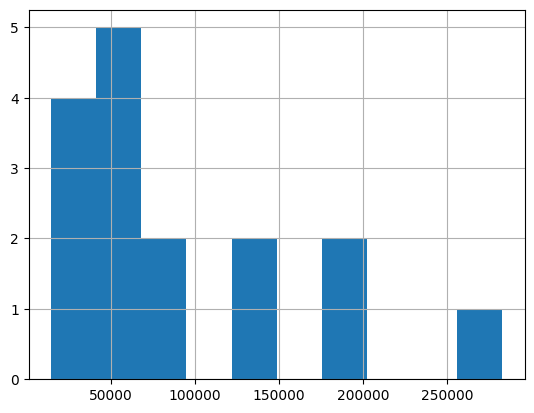

In [84]:
poordta_final['Pobre '].hist()

In [85]:
#first, subset to some interesting area, and then overlay that
gdpoor=agripyC0.query("Departamentos=='Alto Paraguay' | Departamentos=='Boqueron'")

<Axes: >

Text(0.5, 1.0, 'Poverty in Paraguay 2022')

[]

[]

Text(0.5, 80.7222222222222, 'Census Bureau - National Institute of Statistics')

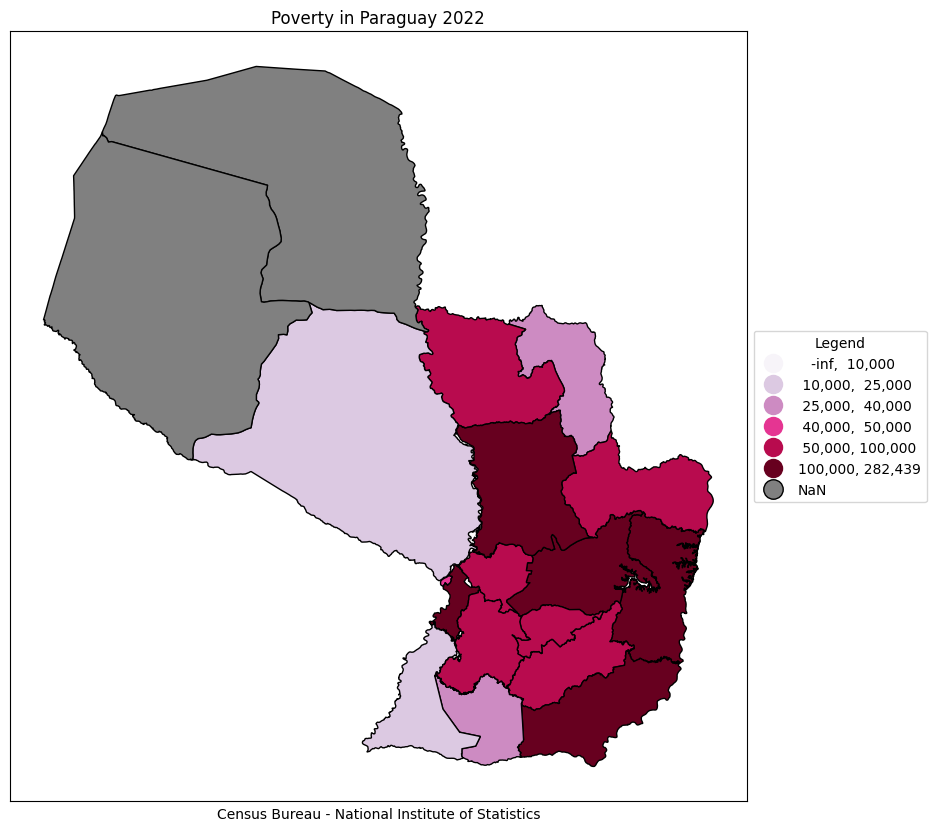

In [86]:
fig, ax = plt.subplots(1, figsize=(10,10))
poordta_final.plot(ax=ax, column='Pobre ', legend=True, cmap='PuRd',
              scheme='user_defined', classification_kwds={'bins': [10000, 25000, 40000, 50000, 100000]}, k=6, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})


leg1 = ax.get_legend()
leg1.set_title('''Legend''')  # Cambié el texto a "Legend"
ax.set_title("Poverty in Paraguay 2022")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''Census Bureau - National Institute of Statistics''')

# plt.savefig('fig.pdf', bbox_inches='tight')

## UNSATISFIED BASIC NEEDS INDEX 2022
Unsatisfied Basic Needs (UBN) are a set of indicators that allow the direct identification of poverty, taking into account aspects that are not necessarily reflected in the income level of a household, taking advantage of the immense potential for geographic disaggregation of census information. (INE, 2022)

In [35]:
sociopy=pd.read_excel('https://docs.google.com/uc?id=115jxjbIDqV-I1nR1Gzy8WZeJqdgft58W&export=download')

In [36]:
sociopy.head(30)

Unnamed: 0                            Resultados preliminares  \
0          NaN                                                NaN   
1          NaN                                           Cuadro 1   
2          NaN  Paraguay. Hogares por Necesidades Básicas Insa...   
3          NaN                                                NaN   
4          NaN                            Departamento y distrito   
5          NaN                                                NaN   
6          NaN                                                NaN   
7          NaN                                                NaN   
8          NaN                                              Total   
9          NaN                                           Asunción   
10         NaN                                         Concepción   
11         NaN                                          San Pedro   
12         NaN                                         Cordillera   
13         NaN                                             Guairá   
14         NaN                                           Caaguazú   
15         NaN                                            Caazapá   
16         NaN                                             Itapúa   
17         NaN                                           Misiones   
18         NaN                                          Paraguarí   
19         NaN                                        Alto Paraná   
20         NaN                                            Central   
21         NaN                                           Ñeembucú   
22         NaN                                            Amambay   
23         NaN                                          Canindeyú   
24         NaN                                   Presidente Hayes   
25         NaN                                           Boquerón   
26         NaN                                      Alto Paraguay   
27         NaN                                                NaN   
28         NaN  Fuente: INE. Censo Nacional de Población y Viv...   

          Unnamed: 2                                         Unnamed: 3  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4   Total de hogares  Hogares con Necesidades Básicas Insatisfechas ...   
5                NaN                                 % Al menos una NBI   
6                NaN                                                NaN   
7                NaN                                                NaN   
8            1770755                                          28.336557   
9             133600                                          17.437126   
10             56837                                          34.278727   
11            105480                                          31.938756   
12             79107                                          26.512192   
13             56409                                          32.241309   
14            126707                                          31.854594   
15             43405                                          36.067273   
16            141148                                          28.746422   
17             34516                                          26.080658   
18             62336                                          29.340991   
19            219459                                          29.443313   
20            515594                                            21.1139   
21             26667                                          34.000825   
22             51678                                          37.723983   
23             57588                                           34.20157   
24             34627                                      

In [37]:
sociopy_cleaned = sociopy.iloc[9:].reset_index(drop=True)

In [38]:
sociopy_cleaned.head(30)

Unnamed: 0                            Resultados preliminares Unnamed: 2  \
0          NaN                                           Asunción     133600   
1          NaN                                         Concepción      56837   
2          NaN                                          San Pedro     105480   
3          NaN                                         Cordillera      79107   
4          NaN                                             Guairá      56409   
5          NaN                                           Caaguazú     126707   
6          NaN                                            Caazapá      43405   
7          NaN                                             Itapúa     141148   
8          NaN                                           Misiones      34516   
9          NaN                                          Paraguarí      62336   
10         NaN                                        Alto Paraná     219459   
11         NaN                                            Central     515594   
12         NaN                                           Ñeembucú      26667   
13         NaN                                            Amambay      51678   
14         NaN                                          Canindeyú      57588   
15         NaN                                   Presidente Hayes      34627   
16         NaN                                           Boquerón      20398   
17         NaN                                      Alto Paraguay       5199   
18         NaN                                                NaN        NaN   
19         NaN  Fuente: INE. Censo Nacional de Población y Viv...        NaN   

   Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  
0   17.437126   4.333084   5.526198   4.957335   5.049401  
1   34.278727   8.154899  12.479547  12.789204    11.1723  
2   31.938756   7.463026    8.53906  12.918089  10.954683  
3   26.512192   6.444436   6.369853   8.702138   9.721011  
4   32.241309   5.706536  11.765853  13.102519  10.464642  
5   31.854594   6.464521   10.73737  13.022169  10.634772  
6   36.067273   7.003801   15.11577  15.643359  11.272895  
7   28.746422   4.396803   9.776972  12.673931   8.995522  
8   26.080658   4.174875   6.121799  11.470043   9.175455  
9   29.340991   5.457521   8.646689  10.688848    10.9375  
10  29.443313   5.452043  12.495272  10.753717   7.873908  
11    21.1139   6.549145   5.148819    7.17328   5.267517  
12  34.000825   4.286196   17.57603  12.119849   8.857389  
13  37.723983  10.068114  17.247184   17.42134  10.768606  
14   34.20157   7.605751  12.627631  15.083003   10.66368  
15  58.203136  12.553788  44.494181  20.481127  15.753603  
16  83.817041  12.378665  77.419355  17.869399  14.702422  
17   62.93518  15.426043  43.854587  19.773033  16.407001  
18        NaN        NaN        NaN        NaN        NaN  
19        NaN        NaN        NaN        NaN        NaN

In [39]:
sociopy_cleaned1 = sociopy_cleaned.iloc[:-2].reset_index(drop=True)

In [40]:
sociopy_cleaned1 = sociopy_cleaned1.drop(columns=['Unnamed: 0'])

In [41]:
pip install unidecode

In [42]:
from unidecode import unidecode

In [43]:
# Supongamos que la columna que quieres normalizar se llama 'nombre'
sociopy_cleaned1['Departamentos'] = sociopy_cleaned1['Resultados preliminares'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Guardar el dataset con la columna normalizada en un nuevo archivo Excel
#yucapy.to_excel("tu_archivo_normalizado.xlsx", index=False)

#I got this code from AI

In [44]:
sociopy_cleaned1.head(30)

Resultados preliminares Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 Asunción     133600  17.437126   4.333084   5.526198   
1               Concepción      56837  34.278727   8.154899  12.479547   
2                San Pedro     105480  31.938756   7.463026    8.53906   
3               Cordillera      79107  26.512192   6.444436   6.369853   
4                   Guairá      56409  32.241309   5.706536  11.765853   
5                 Caaguazú     126707  31.854594   6.464521   10.73737   
6                  Caazapá      43405  36.067273   7.003801   15.11577   
7                   Itapúa     141148  28.746422   4.396803   9.776972   
8                 Misiones      34516  26.080658   4.174875   6.121799   
9                Paraguarí      62336  29.340991   5.457521   8.646689   
10             Alto Paraná     219459  29.443313   5.452043  12.495272   
11                 Central     515594    21.1139   6.549145   5.148819   
12                Ñeembucú      26667  34.000825   4.286196   17.57603   
13                 Amambay      51678  37.723983  10.068114  17.247184   
14               Canindeyú      57588   34.20157   7.605751  12.627631   
15        Presidente Hayes      34627  58.203136  12.553788  44.494181   
16                Boquerón      20398  83.817041  12.378665  77.419355   
17           Alto Paraguay       5199   62.93518  15.426043  43.854587   

   Unnamed: 6 Unnamed: 7     Departamentos  
0    4.957335   5.049401          Asuncion  
1   12.789204    11.1723        Concepcion  
2   12.918089  10.954683         San Pedro  
3    8.702138   9.721011        Cordillera  
4   13.102519  10.464642            Guaira  
5   13.022169  10.634772          Caaguazu  
6   15.643359  11.272895           Caazapa  
7   12.673931   8.995522            Itapua  
8   11.470043   9.175455          Misiones  
9   10.688848    10.9375         Paraguari  
10  10.753717   7.873908       Alto Parana  
11    7.17328   5.267517           Central  
12  12.119849   8.857389          Neembucu  
13   17.42134  10.768606           Amambay  
14  15.083003   10.66368         Canindeyu  
15  20.481127  15.753603  Presidente Hayes  
16  17.869399  14.702422          Boqueron  
17  19.773033  16.407001     Alto Paraguay

In [45]:
sociopy_cleaned1.head(30)

Resultados preliminares Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 Asunción     133600  17.437126   4.333084   5.526198   
1               Concepción      56837  34.278727   8.154899  12.479547   
2                San Pedro     105480  31.938756   7.463026    8.53906   
3               Cordillera      79107  26.512192   6.444436   6.369853   
4                   Guairá      56409  32.241309   5.706536  11.765853   
5                 Caaguazú     126707  31.854594   6.464521   10.73737   
6                  Caazapá      43405  36.067273   7.003801   15.11577   
7                   Itapúa     141148  28.746422   4.396803   9.776972   
8                 Misiones      34516  26.080658   4.174875   6.121799   
9                Paraguarí      62336  29.340991   5.457521   8.646689   
10             Alto Paraná     219459  29.443313   5.452043  12.495272   
11                 Central     515594    21.1139   6.549145   5.148819   
12                Ñeembucú      26667  34.000825   4.286196   17.57603   
13                 Amambay      51678  37.723983  10.068114  17.247184   
14               Canindeyú      57588   34.20157   7.605751  12.627631   
15        Presidente Hayes      34627  58.203136  12.553788  44.494181   
16                Boquerón      20398  83.817041  12.378665  77.419355   
17           Alto Paraguay       5199   62.93518  15.426043  43.854587   

   Unnamed: 6 Unnamed: 7     Departamentos  
0    4.957335   5.049401          Asuncion  
1   12.789204    11.1723        Concepcion  
2   12.918089  10.954683         San Pedro  
3    8.702138   9.721011        Cordillera  
4   13.102519  10.464642            Guaira  
5   13.022169  10.634772          Caaguazu  
6   15.643359  11.272895           Caazapa  
7   12.673931   8.995522            Itapua  
8   11.470043   9.175455          Misiones  
9   10.688848    10.9375         Paraguari  
10  10.753717   7.873908       Alto Parana  
11    7.17328   5.267517           Central  
12  12.119849   8.857389          Neembucu  
13   17.42134  10.768606           Amambay  
14  15.083003   10.66368         Canindeyu  
15  20.481127  15.753603  Presidente Hayes  
16  17.869399  14.702422          Boqueron  
17  19.773033  16.407001     Alto Paraguay

In [46]:
sociopyrenamed = sociopy_cleaned1.rename(columns={
    'Unnamed: 2': 'total_nbi',
    'Unnamed: 3': 'atleast1nbi',
    'Unnamed: 4': 'housing_qual',
    'Unnamed: 5': 'sanity_housing',
    'Unnamed: 6': 'edu_acces',
    'Unnamed: 7': 'subsist_cap',
})

In [47]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [48]:
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.strip()  # Eliminar espacios al inicio y final
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno solo

In [49]:
nbi2022=sociopyrenamed[['Departamentos', 'total_nbi']]

In [50]:
nbi2022.dtypes

Departamentos    object
total_nbi        object
dtype: object

In [51]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
nbitotal= pd.merge(nbi2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
nbitotal[['Departamentos','total_nbi','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos total_nbi      _merge
0        Alto Paraguay      5199        both
1          Alto Parana    219459        both
2              Amambay     51678        both
3             Asuncion    133600        both
4             Boqueron     20398        both
5             Caaguazu    126707        both
6              Caazapa     43405        both
7            Canindeyu     57588        both
8              Central    515594        both
9           Concepcion     56837        both
10          Cordillera     79107        both
11              Guaira     56409        both
12              Itapua    141148        both
13  Lagos, Islas, Rios       NaN  right_only
14            Misiones     34516        both
15            Neembucu     26667        both
16           Paraguari     62336        both
17    Presidente Hayes     34627        both
18           San Pedro    105480        both

In [52]:
#merge part 2
nbitotal_final = pd.merge(nbitotal, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [53]:
type(nbitotal_final)

pandas.core.frame.DataFrame

In [54]:
nbitotal_final=gpd.GeoDataFrame(nbitotal_final, geometry='geometry_x')

In [55]:
nbitotal_final['total_nbi'].hist()

<Axes: >

<Axes: >

Text(0.5, 1.0, 'UNSATISFIED BASIC NEEDS (%)')

[]

[]

Text(0.5, 210.29872565733612, 'CENSUS BUREAU - INE, 2022')

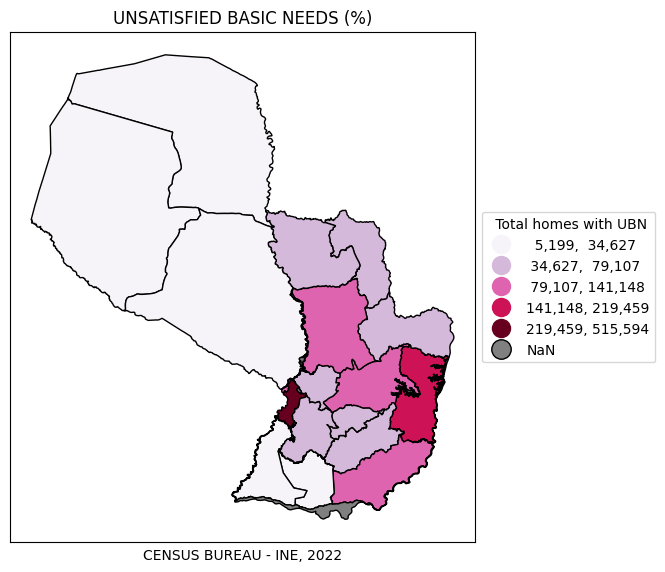

In [56]:
fig, ax = plt.subplots(1, figsize=(6,10))
nbitotal_final.plot(ax=ax, column='total_nbi', legend=True, cmap='PuRd',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title(''' Total homes with UBN''')  # Cambié el texto a "Legend"
ax.set_title("UNSATISFIED BASIC NEEDS (%)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CENSUS BUREAU - INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

## BAD HOUSING QUALITY
Material used in construction: • Urban area: Dirt floor and wall made of wood, stakes, adobe, palm trunk, cardboard, rubber, packing wood, others, or no wall; and roof made of straw, palm trunk, cardboard, rubber, packing wood or other. • Rural area: Dirt floor and wall made of stakes, adobe, palm trunk, cardboard, rubber, packing wood, others, or no wall; and roof made of straw, palm trunk, cardboard, rubber, packing wood or other. 2. Overcrowding: If there are more than 3 people per bedroom

In [67]:
sociopy=pd.read_excel('https://docs.google.com/uc?id=115jxjbIDqV-I1nR1Gzy8WZeJqdgft58W&export=download')

In [68]:
sociopy.head(30)

Unnamed: 0                            Resultados preliminares  \
0          NaN                                                NaN   
1          NaN                                           Cuadro 1   
2          NaN  Paraguay. Hogares por Necesidades Básicas Insa...   
3          NaN                                                NaN   
4          NaN                            Departamento y distrito   
5          NaN                                                NaN   
6          NaN                                                NaN   
7          NaN                                                NaN   
8          NaN                                              Total   
9          NaN                                           Asunción   
10         NaN                                         Concepción   
11         NaN                                          San Pedro   
12         NaN                                         Cordillera   
13         NaN                                             Guairá   
14         NaN                                           Caaguazú   
15         NaN                                            Caazapá   
16         NaN                                             Itapúa   
17         NaN                                           Misiones   
18         NaN                                          Paraguarí   
19         NaN                                        Alto Paraná   
20         NaN                                            Central   
21         NaN                                           Ñeembucú   
22         NaN                                            Amambay   
23         NaN                                          Canindeyú   
24         NaN                                   Presidente Hayes   
25         NaN                                           Boquerón   
26         NaN                                      Alto Paraguay   
27         NaN                                                NaN   
28         NaN  Fuente: INE. Censo Nacional de Población y Viv...   

          Unnamed: 2                                         Unnamed: 3  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4   Total de hogares  Hogares con Necesidades Básicas Insatisfechas ...   
5                NaN                                 % Al menos una NBI   
6                NaN                                                NaN   
7                NaN                                                NaN   
8            1770755                                          28.336557   
9             133600                                          17.437126   
10             56837                                          34.278727   
11            105480                                          31.938756   
12             79107                                          26.512192   
13             56409                                          32.241309   
14            126707                                          31.854594   
15             43405                                          36.067273   
16            141148                                          28.746422   
17             34516                                          26.080658   
18             62336                                          29.340991   
19            219459                                          29.443313   
20            515594                                            21.1139   
21             26667                                          34.000825   
22             51678                                          37.723983   
23             57588                                           34.20157   
24             34627                                      

In [69]:
sociopy_cleaned = sociopy.iloc[9:].reset_index(drop=True)

In [70]:
sociopy_cleaned1 = sociopy_cleaned.iloc[:-2].reset_index(drop=True)

In [71]:
sociopy_cleaned1 = sociopy_cleaned1.drop(columns=['Unnamed: 0'])

In [72]:
sociopy_cleaned1.head(30)

Resultados preliminares Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 Asunción     133600  17.437126   4.333084   5.526198   
1               Concepción      56837  34.278727   8.154899  12.479547   
2                San Pedro     105480  31.938756   7.463026    8.53906   
3               Cordillera      79107  26.512192   6.444436   6.369853   
4                   Guairá      56409  32.241309   5.706536  11.765853   
5                 Caaguazú     126707  31.854594   6.464521   10.73737   
6                  Caazapá      43405  36.067273   7.003801   15.11577   
7                   Itapúa     141148  28.746422   4.396803   9.776972   
8                 Misiones      34516  26.080658   4.174875   6.121799   
9                Paraguarí      62336  29.340991   5.457521   8.646689   
10             Alto Paraná     219459  29.443313   5.452043  12.495272   
11                 Central     515594    21.1139   6.549145   5.148819   
12                Ñeembucú      26667  34.000825   4.286196   17.57603   
13                 Amambay      51678  37.723983  10.068114  17.247184   
14               Canindeyú      57588   34.20157   7.605751  12.627631   
15        Presidente Hayes      34627  58.203136  12.553788  44.494181   
16                Boquerón      20398  83.817041  12.378665  77.419355   
17           Alto Paraguay       5199   62.93518  15.426043  43.854587   

   Unnamed: 6 Unnamed: 7  
0    4.957335   5.049401  
1   12.789204    11.1723  
2   12.918089  10.954683  
3    8.702138   9.721011  
4   13.102519  10.464642  
5   13.022169  10.634772  
6   15.643359  11.272895  
7   12.673931   8.995522  
8   11.470043   9.175455  
9   10.688848    10.9375  
10  10.753717   7.873908  
11    7.17328   5.267517  
12  12.119849   8.857389  
13   17.42134  10.768606  
14  15.083003   10.66368  
15  20.481127  15.753603  
16  17.869399  14.702422  
17  19.773033  16.407001

In [73]:
pip install unidecode

In [74]:
from unidecode import unidecode

In [75]:
# Supongamos que la columna que quieres normalizar se llama 'nombre'
sociopy_cleaned1['Departamentos'] = sociopy_cleaned1['Resultados preliminares'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Guardar el dataset con la columna normalizada en un nuevo archivo Excel
#yucapy.to_excel("tu_archivo_normalizado.xlsx", index=False)

#I got this code from AI

In [76]:
sociopyrenamed = sociopy_cleaned1.rename(columns={
    'Unnamed: 2': 'total_nbi',
    'Unnamed: 3': 'atleast1nbi',
    'Unnamed: 4': 'housing_qual',
    'Unnamed: 5': 'sanity_housing',
    'Unnamed: 6': 'edu_acces',
    'Unnamed: 7': 'subsist_cap',
})

In [77]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [78]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [79]:
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.strip()  # Eliminar espacios al inicio y final
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno solo

In [80]:
nbi2022=sociopyrenamed[['Departamentos', 'housing_qual']]

In [81]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
nbitotal= pd.merge(nbi2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
nbitotal[['Departamentos','housing_qual','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos housing_qual      _merge
0        Alto Paraguay    15.426043        both
1          Alto Parana     5.452043        both
2              Amambay    10.068114        both
3             Asuncion     4.333084        both
4             Boqueron    12.378665        both
5             Caaguazu     6.464521        both
6              Caazapa     7.003801        both
7            Canindeyu     7.605751        both
8              Central     6.549145        both
9           Concepcion     8.154899        both
10          Cordillera     6.444436        both
11              Guaira     5.706536        both
12              Itapua     4.396803        both
13  Lagos, Islas, Rios          NaN  right_only
14            Misiones     4.174875        both
15            Neembucu     4.286196        both
16           Paraguari     5.457521        both
17    Presidente Hayes    12.553788        both
18           San Pedro     7.463026        both

In [82]:
#merge part 2
nbitotal_house = pd.merge(nbitotal, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [83]:
type(nbitotal_house)

pandas.core.frame.DataFrame

In [84]:
nbitotal_house=gpd.GeoDataFrame(nbitotal_house, geometry='geometry_x')

<Axes: >

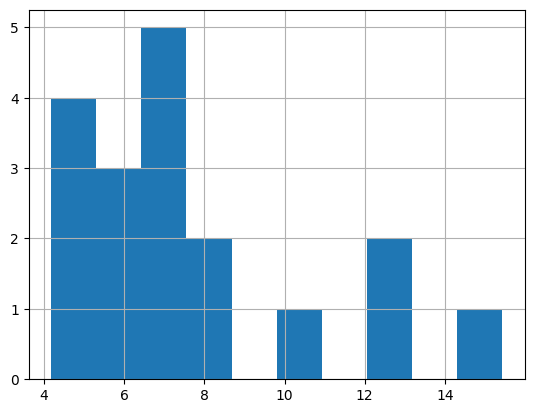

In [85]:
nbitotal_house['housing_qual'].hist()

<Axes: >

Text(0.5, 1.0, 'UNSATISFIED BASIC NEEDS (%)')

[]

[]

Text(0.5, 210.29872565733612, 'CENSUS BUREAU - INE, 2022')

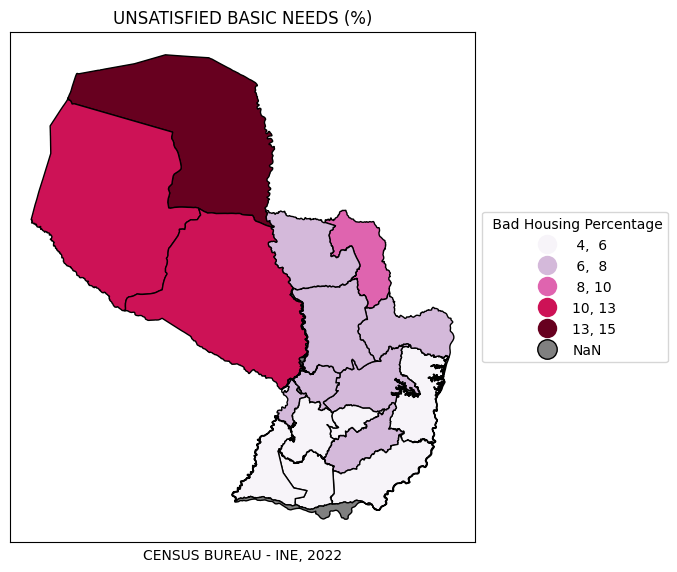

In [86]:
fig, ax = plt.subplots(1, figsize=(6,10))
nbitotal_house.plot(ax=ax, column='housing_qual', legend=True, cmap='PuRd',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title(''' Bad Housing Percentage''')  # Cambié el texto a "Legend"
ax.set_title("UNSATISFIED BASIC NEEDS (%)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CENSUS BUREAU - INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

## UNHEALTHY INFRASTRUCTURE

Availability of water: If the water comes from ESSAP (formerly CORPOSANA), Sanitation Board (SENASA), community network, private network, artesian well or well with pump, and reaches the home through a public tap, neighbor, mobile water carrier or other means, or if it comes from a well without a pump, spring/ykua, cistern, mobile water carrier, river, stream and reservoir) or another source. 4. Excrement disposal: • Urban area: If it has a common latrine, bathroom drain on the ground surface, stream, river, etc., or it does not have sanitary service. • Rural area: If it has a bathroom with a drain on the ground surface, stream, river, etc., or it does not have sanitary service.

In [77]:
sociopy=pd.read_excel('https://docs.google.com/uc?id=115jxjbIDqV-I1nR1Gzy8WZeJqdgft58W&export=download')

In [78]:
sociopy.head(30)

Unnamed: 0                            Resultados preliminares  \
0          NaN                                                NaN   
1          NaN                                           Cuadro 1   
2          NaN  Paraguay. Hogares por Necesidades Básicas Insa...   
3          NaN                                                NaN   
4          NaN                            Departamento y distrito   
5          NaN                                                NaN   
6          NaN                                                NaN   
7          NaN                                                NaN   
8          NaN                                              Total   
9          NaN                                           Asunción   
10         NaN                                         Concepción   
11         NaN                                          San Pedro   
12         NaN                                         Cordillera   
13         NaN                                             Guairá   
14         NaN                                           Caaguazú   
15         NaN                                            Caazapá   
16         NaN                                             Itapúa   
17         NaN                                           Misiones   
18         NaN                                          Paraguarí   
19         NaN                                        Alto Paraná   
20         NaN                                            Central   
21         NaN                                           Ñeembucú   
22         NaN                                            Amambay   
23         NaN                                          Canindeyú   
24         NaN                                   Presidente Hayes   
25         NaN                                           Boquerón   
26         NaN                                      Alto Paraguay   
27         NaN                                                NaN   
28         NaN  Fuente: INE. Censo Nacional de Población y Viv...   

          Unnamed: 2                                         Unnamed: 3  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4   Total de hogares  Hogares con Necesidades Básicas Insatisfechas ...   
5                NaN                                 % Al menos una NBI   
6                NaN                                                NaN   
7                NaN                                                NaN   
8            1770755                                          28.336557   
9             133600                                          17.437126   
10             56837                                          34.278727   
11            105480                                          31.938756   
12             79107                                          26.512192   
13             56409                                          32.241309   
14            126707                                          31.854594   
15             43405                                          36.067273   
16            141148                                          28.746422   
17             34516                                          26.080658   
18             62336                                          29.340991   
19            219459                                          29.443313   
20            515594                                            21.1139   
21             26667                                          34.000825   
22             51678                                          37.723983   
23             57588                                           34.20157   
24             34627                                      

In [79]:
sociopy_cleaned = sociopy.iloc[9:].reset_index(drop=True)

In [80]:
sociopy_cleaned1 = sociopy_cleaned.iloc[:-2].reset_index(drop=True)

In [81]:
sociopy_cleaned1 = sociopy_cleaned1.drop(columns=['Unnamed: 0'])

In [82]:
sociopy_cleaned1.head(30)

Resultados preliminares Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 Asunción     133600  17.437126   4.333084   5.526198   
1               Concepción      56837  34.278727   8.154899  12.479547   
2                San Pedro     105480  31.938756   7.463026    8.53906   
3               Cordillera      79107  26.512192   6.444436   6.369853   
4                   Guairá      56409  32.241309   5.706536  11.765853   
5                 Caaguazú     126707  31.854594   6.464521   10.73737   
6                  Caazapá      43405  36.067273   7.003801   15.11577   
7                   Itapúa     141148  28.746422   4.396803   9.776972   
8                 Misiones      34516  26.080658   4.174875   6.121799   
9                Paraguarí      62336  29.340991   5.457521   8.646689   
10             Alto Paraná     219459  29.443313   5.452043  12.495272   
11                 Central     515594    21.1139   6.549145   5.148819   
12                Ñeembucú      26667  34.000825   4.286196   17.57603   
13                 Amambay      51678  37.723983  10.068114  17.247184   
14               Canindeyú      57588   34.20157   7.605751  12.627631   
15        Presidente Hayes      34627  58.203136  12.553788  44.494181   
16                Boquerón      20398  83.817041  12.378665  77.419355   
17           Alto Paraguay       5199   62.93518  15.426043  43.854587   

   Unnamed: 6 Unnamed: 7  
0    4.957335   5.049401  
1   12.789204    11.1723  
2   12.918089  10.954683  
3    8.702138   9.721011  
4   13.102519  10.464642  
5   13.022169  10.634772  
6   15.643359  11.272895  
7   12.673931   8.995522  
8   11.470043   9.175455  
9   10.688848    10.9375  
10  10.753717   7.873908  
11    7.17328   5.267517  
12  12.119849   8.857389  
13   17.42134  10.768606  
14  15.083003   10.66368  
15  20.481127  15.753603  
16  17.869399  14.702422  
17  19.773033  16.407001

In [83]:
pip install unidecode

In [84]:
from unidecode import unidecode

In [85]:
# Supongamos que la columna que quieres normalizar se llama 'nombre'
sociopy_cleaned1['Departamentos'] = sociopy_cleaned1['Resultados preliminares'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Guardar el dataset con la columna normalizada en un nuevo archivo Excel
#yucapy.to_excel("tu_archivo_normalizado.xlsx", index=False)

#I got this code from AI

In [86]:
sociopyrenamed = sociopy_cleaned1.rename(columns={
    'Unnamed: 2': 'total_nbi',
    'Unnamed: 3': 'atleast1nbi',
    'Unnamed: 4': 'housing_qual',
    'Unnamed: 5': 'sanity_housing',
    'Unnamed: 6': 'edu_acces',
    'Unnamed: 7': 'subsist_cap',
})

In [87]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [88]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [89]:
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.strip()  # Eliminar espacios al inicio y final
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno solo

In [90]:
nbi2022=sociopyrenamed[['Departamentos', 'sanity_housing']]

In [91]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
nbitotal= pd.merge(nbi2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
nbitotal[['Departamentos','sanity_housing','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos sanity_housing      _merge
0        Alto Paraguay      43.854587        both
1          Alto Parana      12.495272        both
2              Amambay      17.247184        both
3             Asuncion       5.526198        both
4             Boqueron      77.419355        both
5             Caaguazu       10.73737        both
6              Caazapa       15.11577        both
7            Canindeyu      12.627631        both
8              Central       5.148819        both
9           Concepcion      12.479547        both
10          Cordillera       6.369853        both
11              Guaira      11.765853        both
12              Itapua       9.776972        both
13  Lagos, Islas, Rios            NaN  right_only
14            Misiones       6.121799        both
15            Neembucu       17.57603        both
16           Paraguari       8.646689        both
17    Presidente Hayes      44.494181        both
18           San Pedro        8.53906        both

In [92]:
#merge part 2
nbitotal_final = pd.merge(nbitotal, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [93]:
type(nbitotal_final)

pandas.core.frame.DataFrame

In [94]:
nbitotal_final=gpd.GeoDataFrame(nbitotal_final, geometry='geometry_x')

<Axes: >

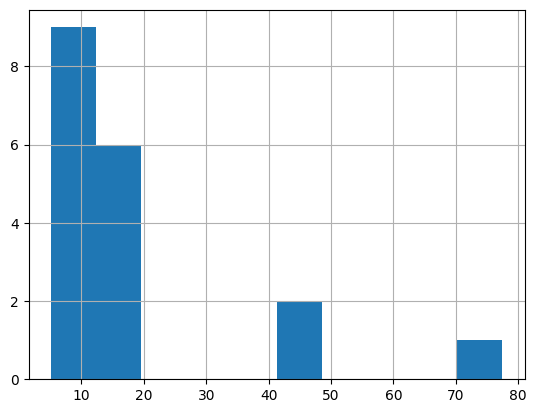

In [95]:
nbitotal_final['sanity_housing'].hist()

<Axes: >

Text(0.5, 1.0, 'UNSATISFIED BASIC NEEDS (%)')

[]

[]

Text(0.5, 210.29872565733612, 'CENSUS BUREAU - INE, 2022')

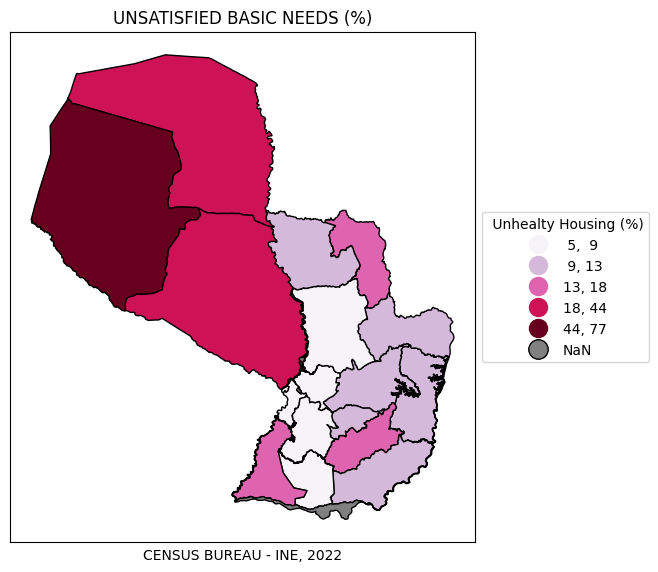

In [96]:
fig, ax = plt.subplots(1, figsize=(6,10))
nbitotal_final.plot(ax=ax, column='sanity_housing', legend=True, cmap='PuRd',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title(''' Unhealty Housing (%)''')  # Cambié el texto a "Legend"
ax.set_title("UNSATISFIED BASIC NEEDS (%)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CENSUS BUREAU - INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

## ACCES TO EDUCATION
School attendance of children: If there is a child aged 6 to 14, related to the head of the household, who does not attend an educational establishment (domestic servants and/or their relatives are excluded). 6. Approved grade: If there is a person aged 15 or older who at the time of the Census did not have the second grade approved, related to the head of the household (domestic servants and/or their relatives are

In [97]:
sociopy=pd.read_excel('https://docs.google.com/uc?id=115jxjbIDqV-I1nR1Gzy8WZeJqdgft58W&export=download')

In [98]:
sociopy.head(30)

Unnamed: 0                            Resultados preliminares  \
0          NaN                                                NaN   
1          NaN                                           Cuadro 1   
2          NaN  Paraguay. Hogares por Necesidades Básicas Insa...   
3          NaN                                                NaN   
4          NaN                            Departamento y distrito   
5          NaN                                                NaN   
6          NaN                                                NaN   
7          NaN                                                NaN   
8          NaN                                              Total   
9          NaN                                           Asunción   
10         NaN                                         Concepción   
11         NaN                                          San Pedro   
12         NaN                                         Cordillera   
13         NaN                                             Guairá   
14         NaN                                           Caaguazú   
15         NaN                                            Caazapá   
16         NaN                                             Itapúa   
17         NaN                                           Misiones   
18         NaN                                          Paraguarí   
19         NaN                                        Alto Paraná   
20         NaN                                            Central   
21         NaN                                           Ñeembucú   
22         NaN                                            Amambay   
23         NaN                                          Canindeyú   
24         NaN                                   Presidente Hayes   
25         NaN                                           Boquerón   
26         NaN                                      Alto Paraguay   
27         NaN                                                NaN   
28         NaN  Fuente: INE. Censo Nacional de Población y Viv...   

          Unnamed: 2                                         Unnamed: 3  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4   Total de hogares  Hogares con Necesidades Básicas Insatisfechas ...   
5                NaN                                 % Al menos una NBI   
6                NaN                                                NaN   
7                NaN                                                NaN   
8            1770755                                          28.336557   
9             133600                                          17.437126   
10             56837                                          34.278727   
11            105480                                          31.938756   
12             79107                                          26.512192   
13             56409                                          32.241309   
14            126707                                          31.854594   
15             43405                                          36.067273   
16            141148                                          28.746422   
17             34516                                          26.080658   
18             62336                                          29.340991   
19            219459                                          29.443313   
20            515594                                            21.1139   
21             26667                                          34.000825   
22             51678                                          37.723983   
23             57588                                           34.20157   
24             34627                                      

In [99]:
sociopy_cleaned = sociopy.iloc[9:].reset_index(drop=True)

In [100]:
sociopy_cleaned1 = sociopy_cleaned.iloc[:-2].reset_index(drop=True)

In [101]:
sociopy_cleaned1 = sociopy_cleaned1.drop(columns=['Unnamed: 0'])

In [102]:
sociopy_cleaned1.head(30)

Resultados preliminares Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 Asunción     133600  17.437126   4.333084   5.526198   
1               Concepción      56837  34.278727   8.154899  12.479547   
2                San Pedro     105480  31.938756   7.463026    8.53906   
3               Cordillera      79107  26.512192   6.444436   6.369853   
4                   Guairá      56409  32.241309   5.706536  11.765853   
5                 Caaguazú     126707  31.854594   6.464521   10.73737   
6                  Caazapá      43405  36.067273   7.003801   15.11577   
7                   Itapúa     141148  28.746422   4.396803   9.776972   
8                 Misiones      34516  26.080658   4.174875   6.121799   
9                Paraguarí      62336  29.340991   5.457521   8.646689   
10             Alto Paraná     219459  29.443313   5.452043  12.495272   
11                 Central     515594    21.1139   6.549145   5.148819   
12                Ñeembucú      26667  34.000825   4.286196   17.57603   
13                 Amambay      51678  37.723983  10.068114  17.247184   
14               Canindeyú      57588   34.20157   7.605751  12.627631   
15        Presidente Hayes      34627  58.203136  12.553788  44.494181   
16                Boquerón      20398  83.817041  12.378665  77.419355   
17           Alto Paraguay       5199   62.93518  15.426043  43.854587   

   Unnamed: 6 Unnamed: 7  
0    4.957335   5.049401  
1   12.789204    11.1723  
2   12.918089  10.954683  
3    8.702138   9.721011  
4   13.102519  10.464642  
5   13.022169  10.634772  
6   15.643359  11.272895  
7   12.673931   8.995522  
8   11.470043   9.175455  
9   10.688848    10.9375  
10  10.753717   7.873908  
11    7.17328   5.267517  
12  12.119849   8.857389  
13   17.42134  10.768606  
14  15.083003   10.66368  
15  20.481127  15.753603  
16  17.869399  14.702422  
17  19.773033  16.407001

In [103]:
pip install unidecode

In [104]:
from unidecode import unidecode

In [105]:
# Supongamos que la columna que quieres normalizar se llama 'nombre'
sociopy_cleaned1['Departamentos'] = sociopy_cleaned1['Resultados preliminares'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Guardar el dataset con la columna normalizada en un nuevo archivo Excel
#yucapy.to_excel("tu_archivo_normalizado.xlsx", index=False)

#I got this code from AI

In [106]:
sociopyrenamed = sociopy_cleaned1.rename(columns={
    'Unnamed: 2': 'total_nbi',
    'Unnamed: 3': 'atleast1nbi',
    'Unnamed: 4': 'housing_qual',
    'Unnamed: 5': 'sanity_housing',
    'Unnamed: 6': 'edu_acces',
    'Unnamed: 7': 'subsist_cap',
})

In [107]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [108]:
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.strip()  # Eliminar espacios al inicio y final
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno solo

In [109]:
nbi2022=sociopyrenamed[['Departamentos', 'edu_acces']]

In [110]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
nbitotal= pd.merge(nbi2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
nbitotal[['Departamentos','edu_acces','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos  edu_acces      _merge
0        Alto Paraguay  19.773033        both
1          Alto Parana  10.753717        both
2              Amambay   17.42134        both
3             Asuncion   4.957335        both
4             Boqueron  17.869399        both
5             Caaguazu  13.022169        both
6              Caazapa  15.643359        both
7            Canindeyu  15.083003        both
8              Central    7.17328        both
9           Concepcion  12.789204        both
10          Cordillera   8.702138        both
11              Guaira  13.102519        both
12              Itapua  12.673931        both
13  Lagos, Islas, Rios        NaN  right_only
14            Misiones  11.470043        both
15            Neembucu  12.119849        both
16           Paraguari  10.688848        both
17    Presidente Hayes  20.481127        both
18           San Pedro  12.918089        both

In [111]:
#merge part 2
nbitotal_final = pd.merge(nbitotal, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [112]:
type(nbitotal_final)

pandas.core.frame.DataFrame

In [113]:
nbitotal_final=gpd.GeoDataFrame(nbitotal_final, geometry='geometry_x')

In [ ]:
nbitotal_final['edu_acces'].hist()

<Axes: >

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
nbitotal_final.plot(ax=ax, column='edu_acces', legend=True, cmap='PuRd',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title(''' Access to Education (%)''')  # Cambié el texto a "Legend"
ax.set_title("UNSATISFIED BASIC NEEDS (%)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CENSUS BUREAU - INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

## SUBSISTENCE CAPACITY
Capacity for Subsistence: If there is no recipient (employed person, person dedicated to farming, raising animals or fishing for household consumption, retired, pensioner or rentier) or if the head has less than 3 years of primary education, and with more than 3 people on average for each recipient


In [10]:
sociopy=pd.read_excel('https://docs.google.com/uc?id=115jxjbIDqV-I1nR1Gzy8WZeJqdgft58W&export=download')

In [11]:
sociopy.head(30)

Unnamed: 0                            Resultados preliminares  \
0          NaN                                                NaN   
1          NaN                                           Cuadro 1   
2          NaN  Paraguay. Hogares por Necesidades Básicas Insa...   
3          NaN                                                NaN   
4          NaN                            Departamento y distrito   
5          NaN                                                NaN   
6          NaN                                                NaN   
7          NaN                                                NaN   
8          NaN                                              Total   
9          NaN                                           Asunción   
10         NaN                                         Concepción   
11         NaN                                          San Pedro   
12         NaN                                         Cordillera   
13         NaN                                             Guairá   
14         NaN                                           Caaguazú   
15         NaN                                            Caazapá   
16         NaN                                             Itapúa   
17         NaN                                           Misiones   
18         NaN                                          Paraguarí   
19         NaN                                        Alto Paraná   
20         NaN                                            Central   
21         NaN                                           Ñeembucú   
22         NaN                                            Amambay   
23         NaN                                          Canindeyú   
24         NaN                                   Presidente Hayes   
25         NaN                                           Boquerón   
26         NaN                                      Alto Paraguay   
27         NaN                                                NaN   
28         NaN  Fuente: INE. Censo Nacional de Población y Viv...   

          Unnamed: 2                                         Unnamed: 3  \
0                NaN                                                NaN   
1                NaN                                                NaN   
2                NaN                                                NaN   
3                NaN                                                NaN   
4   Total de hogares  Hogares con Necesidades Básicas Insatisfechas ...   
5                NaN                                 % Al menos una NBI   
6                NaN                                                NaN   
7                NaN                                                NaN   
8            1770755                                          28.336557   
9             133600                                          17.437126   
10             56837                                          34.278727   
11            105480                                          31.938756   
12             79107                                          26.512192   
13             56409                                          32.241309   
14            126707                                          31.854594   
15             43405                                          36.067273   
16            141148                                          28.746422   
17             34516                                          26.080658   
18             62336                                          29.340991   
19            219459                                          29.443313   
20            515594                                            21.1139   
21             26667                                          34.000825   
22             51678                                          37.723983   
23             57588                                           34.20157   
24             34627                                      

In [12]:
sociopy_cleaned = sociopy.iloc[9:].reset_index(drop=True)

In [13]:
sociopy_cleaned1 = sociopy_cleaned.iloc[:-2].reset_index(drop=True)

In [14]:
sociopy_cleaned1 = sociopy_cleaned1.drop(columns=['Unnamed: 0'])

In [15]:
sociopy_cleaned1.head(30)

Resultados preliminares Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                 Asunción     133600  17.437126   4.333084   5.526198   
1               Concepción      56837  34.278727   8.154899  12.479547   
2                San Pedro     105480  31.938756   7.463026    8.53906   
3               Cordillera      79107  26.512192   6.444436   6.369853   
4                   Guairá      56409  32.241309   5.706536  11.765853   
5                 Caaguazú     126707  31.854594   6.464521   10.73737   
6                  Caazapá      43405  36.067273   7.003801   15.11577   
7                   Itapúa     141148  28.746422   4.396803   9.776972   
8                 Misiones      34516  26.080658   4.174875   6.121799   
9                Paraguarí      62336  29.340991   5.457521   8.646689   
10             Alto Paraná     219459  29.443313   5.452043  12.495272   
11                 Central     515594    21.1139   6.549145   5.148819   
12                Ñeembucú      26667  34.000825   4.286196   17.57603   
13                 Amambay      51678  37.723983  10.068114  17.247184   
14               Canindeyú      57588   34.20157   7.605751  12.627631   
15        Presidente Hayes      34627  58.203136  12.553788  44.494181   
16                Boquerón      20398  83.817041  12.378665  77.419355   
17           Alto Paraguay       5199   62.93518  15.426043  43.854587   

   Unnamed: 6 Unnamed: 7  
0    4.957335   5.049401  
1   12.789204    11.1723  
2   12.918089  10.954683  
3    8.702138   9.721011  
4   13.102519  10.464642  
5   13.022169  10.634772  
6   15.643359  11.272895  
7   12.673931   8.995522  
8   11.470043   9.175455  
9   10.688848    10.9375  
10  10.753717   7.873908  
11    7.17328   5.267517  
12  12.119849   8.857389  
13   17.42134  10.768606  
14  15.083003   10.66368  
15  20.481127  15.753603  
16  17.869399  14.702422  
17  19.773033  16.407001

In [16]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.3 MB/s eta 0:00:00


In [17]:
from unidecode import unidecode

In [18]:
# Supongamos que la columna que quieres normalizar se llama 'nombre'
sociopy_cleaned1['Departamentos'] = sociopy_cleaned1['Resultados preliminares'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

# Guardar el dataset con la columna normalizada en un nuevo archivo Excel
#yucapy.to_excel("tu_archivo_normalizado.xlsx", index=False)

#I got this code from AI

In [19]:
sociopyrenamed = sociopy_cleaned1.rename(columns={
    'Unnamed: 2': 'total_nbi',
    'Unnamed: 3': 'atleast1nbi',
    'Unnamed: 4': 'housing_qual',
    'Unnamed: 5': 'sanity_housing',
    'Unnamed: 6': 'edu_acces',
    'Unnamed: 7': 'subsist_cap',
})

In [20]:
sociopyrenamed.head(30)

Resultados preliminares total_nbi atleast1nbi housing_qual sanity_housing  \
0                 Asunción    133600   17.437126     4.333084       5.526198   
1               Concepción     56837   34.278727     8.154899      12.479547   
2                San Pedro    105480   31.938756     7.463026        8.53906   
3               Cordillera     79107   26.512192     6.444436       6.369853   
4                   Guairá     56409   32.241309     5.706536      11.765853   
5                 Caaguazú    126707   31.854594     6.464521       10.73737   
6                  Caazapá     43405   36.067273     7.003801       15.11577   
7                   Itapúa    141148   28.746422     4.396803       9.776972   
8                 Misiones     34516   26.080658     4.174875       6.121799   
9                Paraguarí     62336   29.340991     5.457521       8.646689   
10             Alto Paraná    219459   29.443313     5.452043      12.495272   
11                 Central    515594     21.1139     6.549145       5.148819   
12                Ñeembucú     26667   34.000825     4.286196       17.57603   
13                 Amambay     51678   37.723983    10.068114      17.247184   
14               Canindeyú     57588    34.20157     7.605751      12.627631   
15        Presidente Hayes     34627   58.203136    12.553788      44.494181   
16                Boquerón     20398   83.817041    12.378665      77.419355   
17           Alto Paraguay      5199    62.93518    15.426043      43.854587   

    edu_acces subsist_cap     Departamentos  
0    4.957335    5.049401          Asuncion  
1   12.789204     11.1723        Concepcion  
2   12.918089   10.954683         San Pedro  
3    8.702138    9.721011        Cordillera  
4   13.102519   10.464642            Guaira  
5   13.022169   10.634772          Caaguazu  
6   15.643359   11.272895           Caazapa  
7   12.673931    8.995522            Itapua  
8   11.470043    9.175455          Misiones  
9   10.688848     10.9375         Paraguari  
10  10.753717    7.873908       Alto Parana  
11    7.17328    5.267517           Central  
12  12.119849    8.857389          Neembucu  
13   17.42134   10.768606           Amambay  
14  15.083003    10.66368         Canindeyu  
15  20.481127   15.753603  Presidente Hayes  
16  17.869399   14.702422          Boqueron  
17  19.773033   16.407001     Alto Paraguay

In [21]:
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.strip()  # Eliminar espacios al inicio y final
sociopyrenamed['Departamentos'] = sociopyrenamed['Departamentos'].str.replace(r'\s+', ' ', regex=True)  # Reemplazar múltiples espacios por uno solo

In [22]:
nbi2022=sociopyrenamed[['Departamentos', 'subsist_cap']]

In [23]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
nbitotal= pd.merge(nbi2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
nbitotal[['Departamentos','subsist_cap','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos subsist_cap      _merge
0        Alto Paraguay   16.407001        both
1          Alto Parana    7.873908        both
2              Amambay   10.768606        both
3             Asuncion    5.049401        both
4             Boqueron   14.702422        both
5             Caaguazu   10.634772        both
6              Caazapa   11.272895        both
7            Canindeyu    10.66368        both
8              Central    5.267517        both
9           Concepcion     11.1723        both
10          Cordillera    9.721011        both
11              Guaira   10.464642        both
12              Itapua    8.995522        both
13  Lagos, Islas, Rios         NaN  right_only
14            Misiones    9.175455        both
15            Neembucu    8.857389        both
16           Paraguari     10.9375        both
17    Presidente Hayes   15.753603        both
18           San Pedro   10.954683        both

In [24]:
#merge part 2
nbitotal_subs = pd.merge(nbitotal, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [25]:
type(nbitotal_subs)

pandas.core.frame.DataFrame

In [26]:
nbitotal_subs=gpd.GeoDataFrame(nbitotal_subs, geometry='geometry_x')

<Axes: >

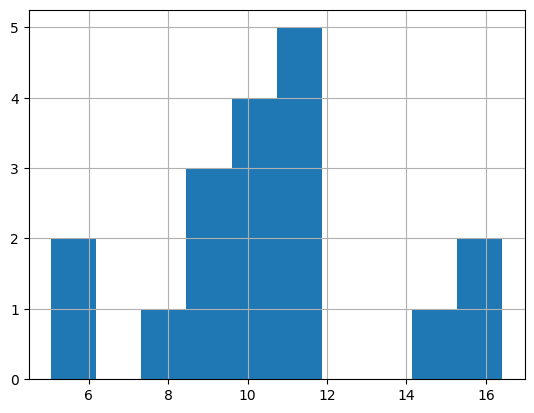

In [27]:
nbitotal_subs['subsist_cap'].hist()

<Axes: >

Text(0.5, 1.0, 'UNSATISFIED BASIC NEEDS (%)')

[]

[]

Text(0.5, 210.29872565733612, 'CENSUS BUREAU - INE, 2022')

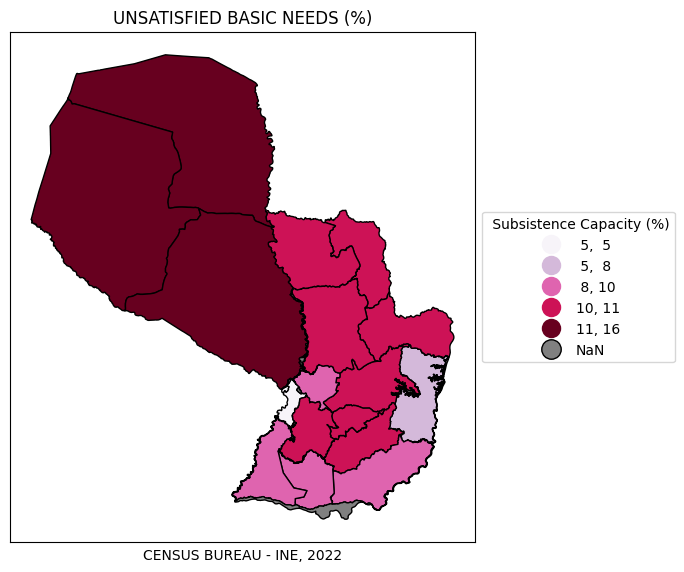

In [28]:
fig, ax = plt.subplots(1, figsize=(6,10))
nbitotal_subs.plot(ax=ax, column='subsist_cap', legend=True, cmap='PuRd',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title(''' Subsistence Capacity (%)''')  # Cambié el texto a "Legend"
ax.set_title("UNSATISFIED BASIC NEEDS (%)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CENSUS BUREAU - INE, 2022''')

# plt.savefig('fig.pdf', bbox_inches='tight')

##  AGRICULTURE IN PARAGUAY
Paraguay is the world’s largest exporter of organic sugar, second-largest producer and exporter of stevia, third-largest soy exporter, and eighth-largest beef exporter.

Paraguay’s efforts to improve agricultural and livestock production present opportunities for basic inputs, such as animal genetics.  Farmers and ranchers are aware that using quality inputs is a key factor in their operations’ profitability and have been adopting advanced production practices, providing opportunities for fertilizers, pest control, and farm equipment.
Paraguay is the world’s second-largest producer of stevia after China.  Paraguay has the potential to be a global provider of stevia, creating opportunities to sell new and used processing machinery.  The most important market for stevia is currently the food and beverage industry, where buyers employ it as a sweetener and a flavoring agent.  Other important stevia markets include health and tea. (US INTERNATIONAL TRADING ADMINISTRATION, 2024)
https://www.trade.gov/country-commercial-guides/paraguay-agricultural-sectors


In [29]:
landpy=pd.read_excel('https://docs.google.com/uc?id=1EUgz0cF_9YY3OLF2BR4InwbqZ1N3LM5L&export=download')

In [30]:
landpy.head(25)

Departamentos      year2022
0                                  Concepcion  1.521325e+06
1                                   San Pedro  1.845159e+06
2                                  Cordillera  4.144014e+05
3                                      Guaira  3.356557e+05
4                                    Caaguazu  1.197215e+06
5                                     Caazapa  8.454182e+05
6                                      Itapua  1.400126e+06
7                                    Misiones  6.743982e+05
8                                   Paraguari  6.925966e+05
9                                 Alto Parana  1.263189e+06
10                                    Central  8.194157e+04
11                                   Neembucu  8.677002e+05
12                                    Amambay  1.092512e+06
13                                  Canindeyu  1.165868e+06
14                           Presidente Hayes  6.261125e+06
15                                   Boqueron  5.870130e+06
16                              Alto Paraguay  4.872899e+06
17                                        NaN           NaN
18  Fincas Agropecuarias en Ha en el año 2022           NaN
19                  Censo Agronomico Nacional           NaN

In [31]:
land2022=landpy[['Departamentos','year2022']]

In [32]:
land2022.dtypes

Departamentos     object
year2022         float64
dtype: object

In [33]:
#merge part 1 (se combinan los datos del shapefile y el data y todos tienen que decir both (deseable))
land2022= pd.merge(land2022, agripyC0, on='Departamentos',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
land2022[['Departamentos','year2022','_merge']] #all good, NEW JERSEY expected not to merge

Departamentos      year2022      _merge
0                               Alto Paraguay  4.872899e+06        both
1                                 Alto Parana  1.263189e+06        both
2                                     Amambay  1.092512e+06        both
3                                    Asuncion           NaN  right_only
4                                    Boqueron  5.870130e+06        both
5                                    Caaguazu  1.197215e+06        both
6                                     Caazapa  8.454182e+05        both
7                                   Canindeyu  1.165868e+06        both
8                   Censo Agronomico Nacional           NaN   left_only
9                                     Central  8.194157e+04        both
10                                 Concepcion  1.521325e+06        both
11                                 Cordillera  4.144014e+05        both
12  Fincas Agropecuarias en Ha en el año 2022           NaN   left_only
13                                     Guaira  3.356557e+05        both
14                                     Itapua  1.400126e+06        both
15                         Lagos, Islas, Rios           NaN  right_only
16                                   Misiones  6.743982e+05        both
17                                   Neembucu  8.677002e+05        both
18                                  Paraguari  6.925966e+05        both
19                           Presidente Hayes  6.261125e+06        both
20                                  San Pedro  1.845159e+06        both
21                                        NaN           NaN   left_only

In [34]:
#merge part 2
land2022_final = pd.merge(land2022, agripyC0, on='Departamentos',how='inner',indicator=False) #Este codigo es para combinar solo aquellos que dicen both

In [35]:
type(land2022_final)

pandas.core.frame.DataFrame

In [36]:
land2022_final=gpd.GeoDataFrame(land2022_final, geometry='geometry_x')

<Axes: >

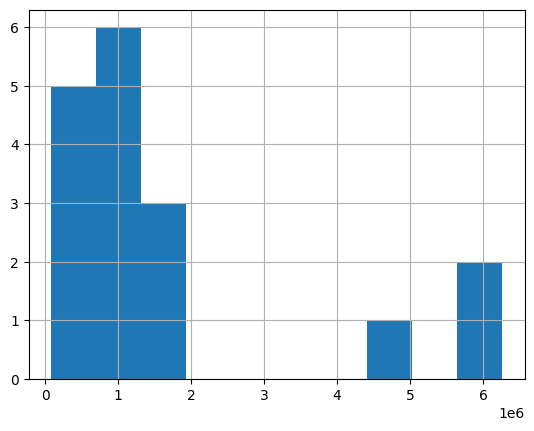

In [37]:
land2022_final['year2022'].hist()

<Axes: >

Text(0.5, 1.0, "Paraguay's 2022 Agricultural Land (ha)")

[]

[]

Text(0.5, 210.29872565733612, 'CAN- NATIONAL AGRONOMIC CENSUS')

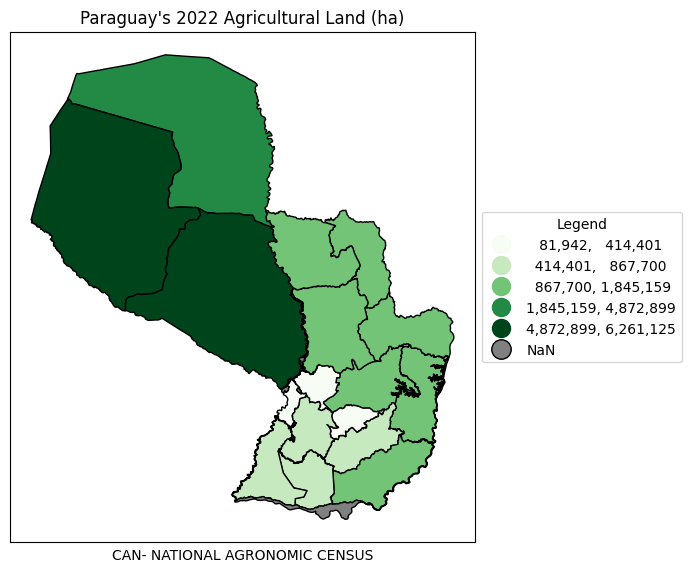

In [38]:
fig, ax = plt.subplots(1, figsize=(6,10))
land2022_final.plot(ax=ax, column='year2022', legend=True, cmap='Greens',
              scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
              legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
              missing_kwds={'color': 'grey', 'edgecolor': 'black'})

leg1 = ax.get_legend()
leg1.set_title('''Legend''')  # Cambié el texto a "Legend"
ax.set_title("Paraguay's 2022 Agricultural Land (ha)")
ax.set_xticks([])  # Elimina las etiquetas en el eje x
ax.set_yticks([])  # Elimina las etiquetas en el eje y
ax.set_xlabel('''CAN- NATIONAL AGRONOMIC CENSUS''')

# plt.savefig('fig.pdf', bbox_inches='tight')

<ipython-input-39-511352237b1f>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  agripyC0['centroid'] = agripyC0.geometry.centroid


<Axes: >

Text(-59.41002564020435, -20.589775106924037, 'Alto Paraguay')

Text(-54.96344820654604, -25.395010354542094, 'Alto Parana')

Text(-56.059772864642426, -22.883499473953474, 'Amambay')

Text(-57.55120273880594, -25.232519275728773, 'Asuncion')

Text(-61.05800990815893, -21.90412229561398, 'Boqueron')

Text(-55.88829251822675, -25.18617423083693, 'Caaguazu')

Text(-56.05890687659377, -26.234855944824425, 'Caazapa')

Text(-55.21454424019448, -24.231487705503397, 'Canindeyu')

Text(-57.497947339254054, -25.54423328787446, 'Central')

Text(-57.11931334517439, -22.838760815277286, 'Concepcion')

Text(-56.94167022305784, -25.194067379616826, 'Cordillera')

Text(-56.295397662675235, -25.822987895702347, 'Guaira')

Text(-55.70865624673644, -26.78721100989233, 'Itapua')

Text(-56.64695466967042, -26.57742202313012, 'Lagos, Islas, Rios')

Text(-57.103408931281535, -26.895587634753422, 'Misiones')

Text(-57.892330769003095, -26.727551637255974, 'Neembucu')

Text(-57.127675327789746, -26.039153064708902, 'Paraguari')

Text(-58.68470974246988, -23.611652913512483, 'Presidente Hayes')

Text(-56.63383765013266, -24.16259720021804, 'San Pedro')

Text(0.5, 1.0, "Paraguay's 2022 Agricultural Land (ha)")

[]

[]

Text(0.5, 125.15756013570739, 'CAN - NATIONAL AGRONOMIC CENSUS')

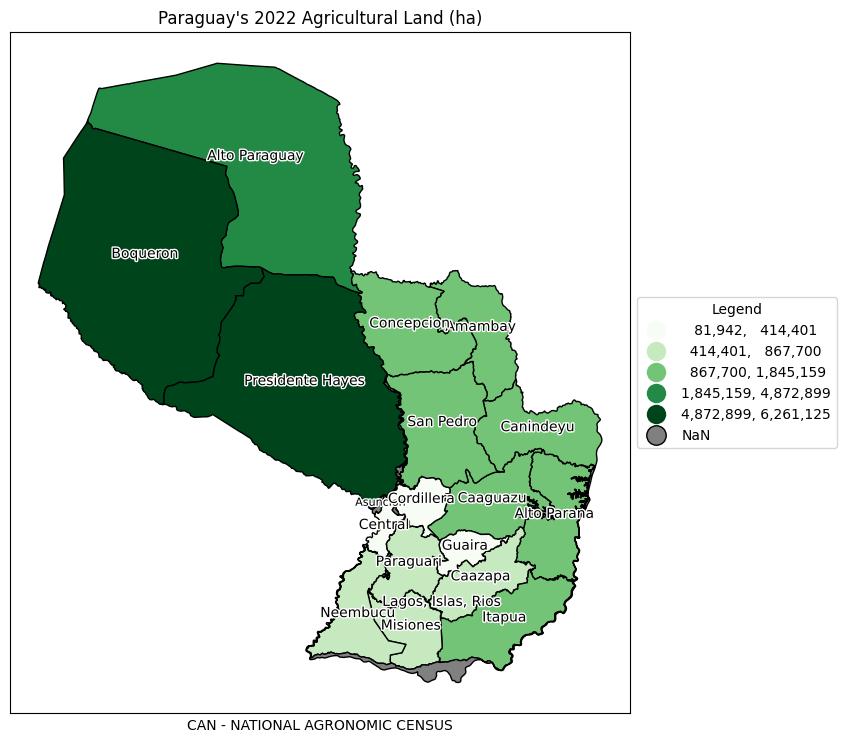

In [39]:
from matplotlib.patheffects import withStroke

# Calcula los centroides de los polígonos para ubicar las etiquetas
agripyC0['centroid'] = agripyC0.geometry.centroid

fig, ax = plt.subplots(1, figsize=(8, 10))
land2022_final.plot(ax=ax, column='year2022', legend=True, cmap='Greens',
                    scheme='natural_breaks', k=5, edgecolor='black', linewidth=1,
                    legend_kwds={"fmt": "{:,.0f}", 'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'markerscale': 1.4},
                    missing_kwds={'color': 'grey', 'edgecolor': 'black'})

# Añade etiquetas y flechas para departamentos pequeños con borde
for geom, x, y, label in zip(agripyC0.geometry, agripyC0['centroid'].x, agripyC0['centroid'].y, agripyC0['Departamentos']):
    if geom.area < 0.1:  # Ajusta el valor de 0.1 según el tamaño relativo de los departamentos
        # Etiqueta fuera con una flecha para departamentos pequeños
        offset = 0.05  # Ajusta el valor para definir la distancia del texto
        ax.annotate(label, xy=(x, y), xytext=(x + offset, y + offset),
                    fontsize=8, color='black',
                    arrowprops=dict(arrowstyle="->", color='black'),
                    path_effects=[withStroke(linewidth=2, foreground="white")],  # Borde más grueso
                    horizontalalignment='center')
    else:
        # Etiqueta dentro para departamentos grandes
        ax.annotate(label, xy=(x, y), horizontalalignment='center',
                    fontsize=10, color='black',
                    path_effects=[withStroke(linewidth=2, foreground="white")])  # Borde más grueso

leg1 = ax.get_legend()
leg1.set_title("Legend")
ax.set_title("Paraguay's 2022 Agricultural Land (ha)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("CAN - NATIONAL AGRONOMIC CENSUS")

# plt.savefig('fig.pdf', bbox_inches='tight')

Acording to the National Agronomic Census in 2022, Of the 291,497 agricultural farms, 283,052 are located in the Eastern Region, which represents 97% of the total number of farms, and 8,445 are located in the Western Region, which represents 3%. Regarding the surface area of ​​agricultural farms, there is a total of 30,401,660 ha. The Eastern Region concentrates 44% of the surface area (13,397,506 ha) and the Western Region 56% (17,004,154 ha). (FOOD AND AGRICULTURE ORGANIZATION, 2023)
https://www.fao.org/paraguay/noticias/detail-events/en/c/1644249/#:~:text=Con%20relaci%C3%B3n%20a%20la%20superficie,(17.004.154%20ha).

##COMPARATIVE MAPS AND INTERPRETATION

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
pop2

<Axes: >

[]

[]

<Axes: >

[]

[]

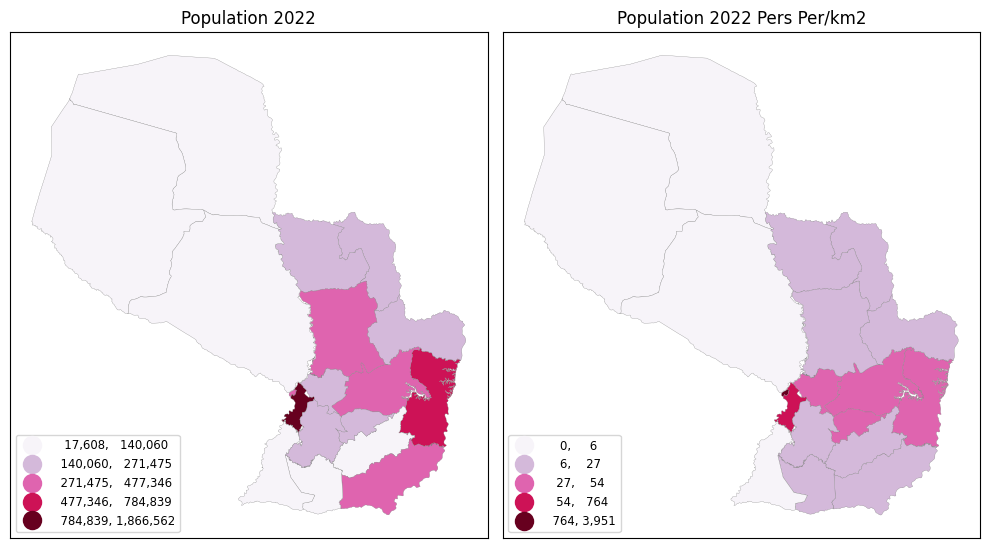

In [66]:
#side-by-side and overlay

#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
pop2.plot(ax=axs[0],column='Poblacion',legend=True,cmap='PuRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 2022")
axs[0].set_xticks([]); axs[0].set_yticks([])

popdenpy_final.plot(ax=axs[1],column='Densidad Hab/km2',legend=True,cmap='PuRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 2022 Pers Per/km2")
axs[1].set_xticks([]); axs[1].set_yticks([])


### Paraguay's total Population and Population per/km2


The department of Central stands out as the most populated in Paraguay with 1,883,927 residents and a high population density of 764.27 people per km², highlighting its urbanized nature and proximity to the capital. In contrast, Asunción, the capital city, has a smaller population of 462,241 but an exceptionally high density of 3,950.78 people per km² due to its compact area. Alto Paraná, with 763,702 residents and a density of 51.27 people per km², balances significant population levels with a mix of urban and rural landscapes. Similarly, Itapúa (449,642 residents, 27.21 people per km²) and Caaguazú (431,519 residents, 37.61 people per km²) reflect their roles as hubs for agriculture and regional development. While Central and Asunción are densely populated urban centers, departments like Alto Paraná, Itapúa, and Caaguazú demonstrate more distributed population patterns.

The department of Alto Paraguay has the lowest population density in Paraguay, with only 0.21 people per km², despite covering a vast area of 82,349 km² and a population of just 17,195. Similarly, Boquerón has a density of 0.78 people per km², reflecting its sparse population of 71,078 spread over 91,669 km². Presidente Hayes, with a density of 1.69 people per km², has 123,313 residents across 72,907 km². These departments, located in the Chaco region, are characterized by extensive land areas and low population densities, largely due to harsh environmental conditions and limited urbanization. In contrast to the more densely populated departments like Central and Asunción, these regions demonstrate the challenges of development in remote and arid areas of Paraguay.

<Axes: >

[]

[]

<Axes: >

[]

[]

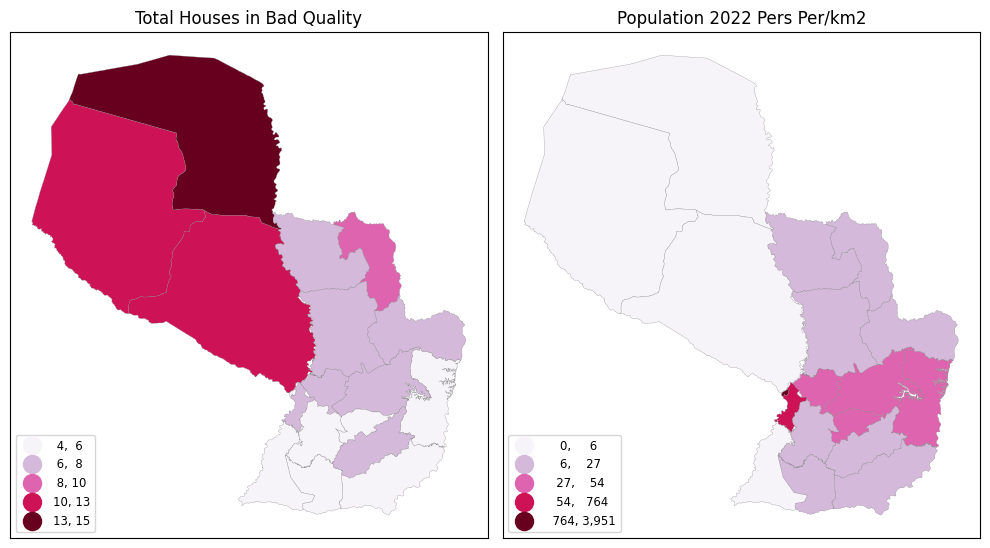

In [87]:
#side-by-side and overlay

#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
nbitotal_house.plot(ax=axs[0],column='housing_qual',legend=True,cmap='PuRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Total Houses in Bad Quality")
axs[0].set_xticks([]); axs[0].set_yticks([])

popdenpy_final.plot(ax=axs[1],column='Densidad Hab/km2',legend=True,cmap='PuRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 2022 Pers Per/km2")
axs[1].set_xticks([]); axs[1].set_yticks([])

### Paraguay's Bad Qualilty of Houses and Population per Km2

From these two maps, you can see that in Paraguay, departments with low population density, such as Alto Paraguay (0.21 people/km²), Boquerón (0.78 people/km²), and Presidente Hayes (1.69 people/km²), exhibit the highest rates of bad-quality housing, with scores of 15.43, 12.38, and 12.55, respectively. This indicates significant challenges in infrastructure development in remote and sparsely populated regions. In contrast, urbanized areas like Central (764.27 people/km²) and Asunción (3,950.78 people/km²) have relatively lower rates of bad-quality housing, at 6.55 and 4.33, reflecting the benefits of urban development while still highlighting inequalities in access to quality housing. Notably, Misiones (11.63 people/km²) stands out with the lowest rate of bad-quality housing (4.17), showcasing successful efforts in improving housing conditions in areas with moderate population density. This comparison underscores the disparities between urban and rural areas and the need for targeted housing development strategies in low-density regions.

<Axes: >

[]

[]

<Axes: >

[]

[]

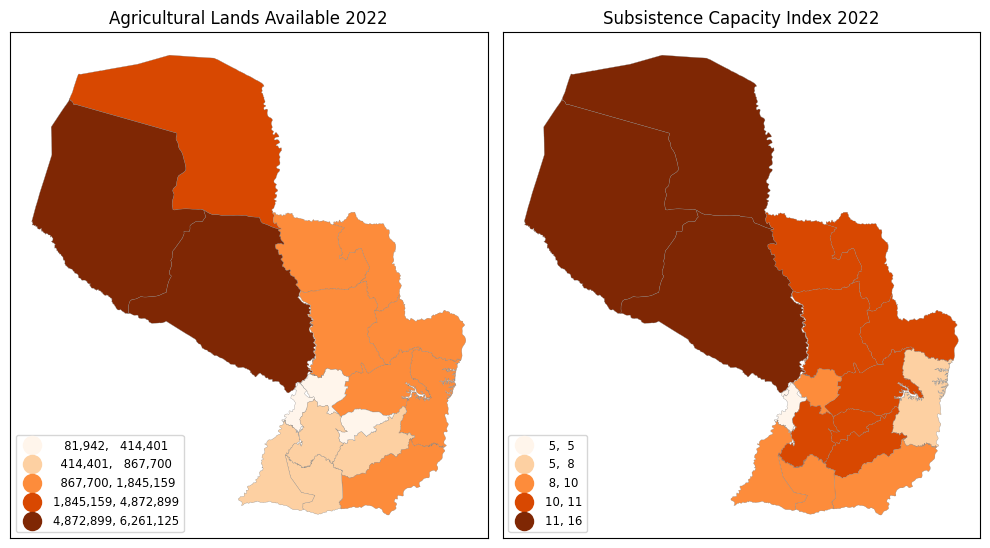

In [40]:
#side-by-side and overlay

#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
land2022_final.plot(ax=axs[0],column='year2022',legend=True,cmap='Oranges',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Agricultural Lands Available 2022")
axs[0].set_xticks([]); axs[0].set_yticks([])

nbitotal_subs.plot(ax=axs[1],column='subsist_cap',legend=True,cmap='Oranges',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Subsistence Capacity Index 2022")
axs[1].set_xticks([]); axs[1].set_yticks([])

### Paraguay's Land Available for Agriculture and The Subsistence Capacity

The departments of Alto Paraguay, Boquerón, and Presidente Hayes dominate in agricultural land usage, with 4,872,899 hectares, 5,870,129 hectares, and 6,261,125 hectares, respectively. Despite this, they also have the highest subsistence capacity rates, at 16.41, 14.70, and 15.75, respectively, indicating that a significant proportion of households lack the capacity for self-sustenance. This disparity suggests that while these regions have vast agricultural potential, much of the land is likely utilized for large-scale, export-oriented agriculture, which does not directly benefit the local population. Inequitable land distribution and low integration of local communities into agricultural productivity may contribute to these challenges.

The urbanized department of Asunción and its neighboring department, Central exhibit the lowest subsistence capacity rates, at 5.05 and 5.27, respectively, indicating that only a small proportion of households struggle with subsistence. This aligns with their minimal agricultural land use—Central utilizes only 81,942 hectares for agriculture, reflecting its predominantly urbanized landscape. These areas benefit from diversified economies that are less reliant on agricultural productivity, providing greater economic opportunities for residents.

Smaller departments like Guairá (335,656 hectares), Cordillera (414,401 hectares), and Paraguarí (692,597 hectares) show moderate subsist_cap rates of 9.72, 9.72, and 10.94, respectively. These regions rely on small-scale farming, which supports local subsistence but may lack the capacity for significant economic growth. Similarly, Misiones and Ñeembucú, with agricultural lands of 674,398 hectares and 867,700 hectares, and subsist_cap rates of 9.18 and 8.86, reflect modest agricultural activity that supports household needs while highlighting areas for improvement in agricultural efficiency and market integration.


##TREE MAPS

In [61]:
import seaborn as sns
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np
import pandas as pd

In [90]:
# Asegúrate de que los datos tienen las columnas requeridas
# Por ejemplo, 'Departamentos', 'Pobreza Extrema' y 'Poblacion'

# Datos simulados para demostración (ajusta esto con los nombres de columnas reales en poordta_final)
df = poverty.copy()
df['country'] = "Paraguay"  # Agrega un nivel superior si no existe

# Crea el mapa temático
fig = px.treemap(df,
                 path=[px.Constant("Paraguay"), 'Departamentos'],  # Ajusta 'Departamentos' según tus datos
                 values='Pobre ',  # Ajusta 'Poblacion' o el campo que desees usar
                 color='Pobreza Extrema',  # Ajusta el campo del color
                 hover_data=['Pobreza Extrema'],  # Ajusta los datos para hover
                 color_continuous_scale='rdpu',
                 color_continuous_midpoint=np.average(df['Pobreza Extrema'], weights=df['Pobre ']))  # Ajusta los pesos si es necesario

# Muestra la visualización
fig.show()

Paraguay’s departments reveal stark contrasts in levels of poverty (pobre) and extreme poverty (extrema pobreza), reflecting regional disparities in economic conditions. Central, the most urbanized department, has the highest population in poverty (252,462) and extreme poverty (29,976), which can be attributed to its dense population and socioeconomic inequalities in urban areas. Alto Paraná follows, with 143,499 people in poverty and 48,519 in extreme poverty, likely due to its mix of urban centers and rural zones. In the rural eastern departments like Caaguazú and Itapúa, poverty levels are significant, with 132,519 and 110,512 people in poverty, respectively, and 48,200 and 36,619 in extreme poverty, highlighting the challenges of economic development in agricultural regions.

In the Chaco region, departments such as Presidente Hayes, Boquerón, and Alto Paraguay have lower absolute numbers of poverty and extreme poverty due to their sparse populations; however, the rates relative to population size are likely higher, reflecting limited access to resources and infrastructure. For instance, Presidente Hayes reports 11,573 people in poverty and 2,846 in extreme poverty. Smaller departments like Ñeembucú and Misiones also report lower absolute numbers, with 14,937 and 27,280 people in poverty, respectively, but these figures still signify substantial proportions of their populations.

This analysis underscores how urbanized areas like Central and Alto Paraná face significant challenges despite economic activity, while rural and remote regions remain constrained by infrastructure and resource limitations, exacerbating poverty and extreme poverty levels. Addressing these disparities requires targeted interventions to improve economic opportunities and social support in both urban and rural areas.